# Chess Moves Generator

####Big Data Computing Project - A.Y. 2021/2022 - Valerio Goretti 1811110 
###goretti.1811110@studenti.uniroma1.it
<img src="https://www.dropbox.com/s/dthoa5ltlvk1aua/chess-wallpaper-23567-24220-hd-wallpapers-1782160017-1519587376418.jpg?dl=1">

#Project Index
<p><i><b>Introduction</b></i>. The goal of the project, the approaches used and the context are presented </p>
<p><i><b>Section 1: Dataset presentation</b></i>. In this section, the dataset is read and explored </p>
<p><i><b>Section 2: First approach</b></i>. This section provides an explanation of the <b>first approach</b> used to achieve the goal and the results obtained</p>
<p><i><b>Section 3: Second approach</b></i>. This section provides an explanation of the <b>second approach</b> used to achieve the goal and the results obtained</p>
<p><i><b>Section 4: Third approach</b></i>. This section provides an explanation of the <b>third approach</b> used to achieve the goal and the results obtained</p>
<p><i><b>Section 5: Application to use case</b></i>. In this section an application is developed to test the model create</p>

# Introduction
<p>Chess is one of the oldest and most popular board games, played by two opponents on a chessboard with 64 squares arraged in eigth-by-eigth grid. The two players have a set of pieces (pawn, knight, bishop, queen, king) and can move them in alternating turns on the board according to precise rules of movement.</p>
  <img src="https://www.dropbox.com/s/8j8z1tj9aqpsej2/ChessboardPosition.png?dl=1" width="400" height="500">
<p>People have been trying to write programs that could play perfect chess games since 1951. The first person to write a program to move the pieces on the board in the best possible way was Alan Turing. The program is called <a href="https://www.chessprogramming.org/Turochamp">Turochamp</a>.<br>
In recent years, chess engines have surpassed the level of humans but are still unable to make perfect games from the first move to the last. This is due to the fact that all possible moves in a chess game are 10^123. This number was calculated by Claude Shannon and took the name "Shannon's number". </p>

<p>A chess game is divided into 3 parts: <b>Opening</b>, the initial part of the game in which space is given to the pieces. <b>Middlegame</b>, the middle part of the game, is the longest and most reasoned part. Moreover, it is the least textbook part; players try to make strategies and tactics to get to the final part of the game with an advantage. The final part is called the <b>endgame</b>, and here players try to finish the game with a win.</p>

<p> <b>The goal</b> of this work is to create a model that predicts the next move during a chess game. <b>The challenge</b>, however, is to make the model as if the chess game is a conversation. So the moves take the place of the words and the game becomes a conversation. To do this I need a neural network that can generate text. So as to make a chess game an exchange of words between two people. </p>

<p>In order to manage the dataset, Spark has been used. Concerning the Machine Learning parts, Keras and Tensorflow have been used for implementations.<br>
The project was developed on Databricks Community Edition, Kaggle, and Paperspace. Since Databricks does not provide a gpu, Kaggle and Paperspace were used because they provide this possibility. After the data preparation cells for learning, these data were saved in Databricks DBFS in order to export and use them on other platforms. Once used, the produced cells were reported on this notebook and the produced outputs were imported through Dropbox. all cells reported from other platforms were re-run on databricks to show that it works. The cells containing model fits have been executed to demonstrate the functionality of the code but then blocked because it have already been executed externally. These cells are always followed by cells used to import the relative models.</p>

## Neural Network Background
#### Since the same Neural Network was used for all approaches, it is explained in the introduction to avoid repetition to the reader while reading the notebook


<p>Recurrent Neural Networks (RNN) deal with my task. Indeed, the RNN taking sequences as input and modeling them over time. But RNNs have a problem, they can't store sequences that are too long. So LSTM neural networks are used. LSTM is a RNN created to solve the problem of RNNs. These networks can process sequences of data and maintain their states for a long time using different types of gates. When a new input comes in RNN, it modifies the existing information without deciding if the incoming input is important or not, whereas in the case of LSTM gates are available to allow only important inputs to modify the existing information.
</p> <br>

<img src="https://www.dropbox.com/s/ufsxap9xq59jjhl/RNNVSLSTM.jpg?dl=1"> <br>

<p>In more detail, RNNs during the processing of their data in addition to the input also use the output of the previous step. In the LSTM it works the same way, but there is an internal state. So the input to be processed will not only be that given by the input and the output of the previous step but also an additional input given by the internal state. Once these 3 data are processed, the processing provides not only the output but also an update to the internal state. The internal state consists of 3 parts. <b>Forget Gate</b>, Input state and output state. Forget state is used for This gate is for selecting relevant information and discarding irrelevant information. The data is passed through a sigmoid function that returns a value between 0 and 1, if it returns 0 the information is ignored otherwise considered within the input. <b>Input Gate</b> is resposible for adding information to the model. It create an array of information that contains value from -1 to 1 with the tanh function. This value is filtered by the sigmoid function that mantain the relevant information should be added or updated into the internal state. The <b>Output Gate</b> is responsible for generating outputs. In particuar between all the information that are stored in a state which part of it should be output in this particular instace. These gates are part of the network parameters and are learned during the training.</p>
<p></p>

<p>This neural network is used in this work, below you can see the general architecture of the network used. </p>
<img src="https://www.dropbox.com/s/tx5gzq5fyl2xgpo/LSTM_Architecture.jpg?dl=1"> <br>
<p>In the 3 proposed approaches, the network used generally follows the reported architecture.  For each approach, more than one model was trained. In some models the networks may be slightly different, changes affect the numbers of units for the LSTM networks, and dropouts were added or not added and at different percentage rates. These changes were made to increase model performance and to evaluate the different shades of the network during evaluation</p>

## Use of data in the network

<p>Data within the lstm network were passed using the sliding window technique. This technique consists of breaking sentences (in the case of this work chess games) into arrays of fixed length so that the chosen sentence is covered all over.<br>
For example, the sliding window of the sentence "the man is walking down the street." is: </p>
<img src="https://www.dropbox.com/s/3d4fc2zzim1of08/slide_window.jpeg?dl=1"> <br>
<p>In this work the approaches differ in this aspect. The data are handled in the same way but are modeled differently. the modeling started from a very raw granularity of the move, considering only the piece, to the move that also includes disambiguations.</p>

<p>Peculiarities of algebraic notation (it is explained in the "Chess Background" section) were not considered in all approaches. The features not considered are: piece takes (the "x" symbol in the move ), check and ckeckmate. It was not considered since these are features that need the state of the chessboard. Since chessboard state is not used in this project these types of moves were modified without these features. For example, the move Nxf3 will be considered as Nf3. </p>

## Evaluation Background
#### Since the same methods of evaluation was used for all approaches, it is explained in the introduction to avoid repetition to the reader while reading the notebook

<p>Two types of evaluations were made, one Extrinsic and one Intrinsic.</p>
<p><b>The Extrinsic evaluation</b>, it was measured how often the models correctly predicted the moves played in the test set games. Using this method, since the model has never seen the games used in evaluation, it is as if high-level players play with hints given by the models, and if one of them accepts the hint, the model's score is increased.</p>
<p>In <b>The Intrinsic  evaluation</b> metrics to evaluate the model are used. Compared to Extrinsic evaluation, the context of use is lost. In this work the <b>perplexity</b> metric was used. Perplexity is a measurement of how well a probability model predicts a sample.<br>
The perplexity is calculated with the formula below:</p>
<img src="https://www.dropbox.com/s/qrbz6aykypi5tam/perplexity.png?dl=1"> 
<p>The perplexity is calculated as the multiplication between all the probabilities of the predictions made during a game by normalizing the multiplication by the number of moves to be predicted. <br>
In this work, in evaluation phase, the model made predictions and the probabilities of each prediction were multiplied and then normalized. At the end of evaluation each model has a perplexity list that defines the perplexities for all the test set matches seen. In order to have a single value with which to compare the models, an average is calculated among these perplexities.
</p>

## Chess Background
####This part is included to give the domain knowledge needed to understand the work 
<p id="notation">In the chess game to identify a move there is a notation called <a href="https://en.wikipedia.org/wiki/Algebraic_notation_(chess)">algebraic notation</a>. This notation is also used for this work. First, this notation involves naming the cells of the chessboard with a letter to identify the column and a number to identify the row related to the cell. </p>


<img src="https://www.dropbox.com/s/njage6me1mxni0m/Notation.png?dl=1" width="400" height="500">

<p>The <b>pieces</b> are identified with an uppercase letter: K for king, Q for queen, R for rook, B for bishop, and N for knight. When no piece is indicated on the move we refer to pawns.</p>
<p>Each <b>move</b>of a piece is indicated by the piece's uppercase letter, plus the coordinate of the destination square. For example, Nf3 means that the Knight is moved in the cell f3. </p>
<p>If the knight in cell f3 takes an opponent's piece, an "x" will be added just after the piece and the move will become "Nxf3". </p>
<p> Another distinction is made between pieces of the same color. Having two knights available, if both can go into the f3 cell, we need to distinguish between them. To <b>disambiguate the moves</b> there are 2 ways.If the pieces are distinguishable on the basis of the column, we place the identifying letter of the column after the piece letter. For example, One knight is on d4, the other is on g5, both can go to f3, but we want to move the one that is on d4 and so the move will be "Ndf3". If the knight on f3 takes an opponent's piece, the move becomes Ndxf3. Instead, if The knights are on the same column, for example, one knight is on d2 and one is on d4, we will distinguish the two pieces by noting the line on which they are placed. For example, if we want to move the knight to d4 the move will be "N4f3", the same rule applies for the "x", if with this move the knight takes a piece the "x" should be put after the disambiguation and before the cell. </p>
<p>When a pawn arrives in the last row of the column, it can be changed to another piece at will, this move is called <b>pawn promotion</b>. In case the white pawn in the column in and is promoted to queen the move will be "e8Q".</p>
<p>In chess it is possible to make some special moves such as <b>Castling</b>. Castling is a special move to protect the king. It's the only time in chess you can move two pieces in one move. The king moves two squares to the right or left and the rook moves directly to the other side of the king. You can only castle if neither the rook or king have moved and there are no pieces in the way. Depending on where the king moves, whether he "swaps" position with the rook closest to him is called kingside castling and is identified with the "0-0" string. However, if it is exchanged with the rook closest to the queen it is called queenside castling and the move is identified with "0-0-0". </p>
<p>The situation in which the king is under attack from an opposing piece is called <b>check</b>. A move that places the opponent's king in check usually has the symbol "+" at the end of the move. For example, "Nc7+". </p>
<p>If the king is under attack by two pieces at the same time, it is called a <b>double check</b> and is marked ++. For example, "Bh6++".</p>
<p>The situation in which one of the two kings is attacked by an opponent's piece and the player has no more legal moves to play is called <b>checkmate</b>. The move that led to checkmate is marked by # at the end. for example, "Qh8#".</p>

# Section 1: Dataset presentation
<p> I this section the dataset is loaded, we do an exploration on the dataset and prepare it for the task</p>
<p>The dataset was chosen by kaggle, and can be found <a href="https://www.kaggle.com/datasets/milesh1/35-million-chess-games">here</a>. The dataset is contained in a txt file and includes 3.5 million chess games. For each game there is an identifying number, the date, the final result of the game, The score of the players at that time, the length of the game, some control fields, and the set of moves in the game. All data are separated by a space except for the game that has ### before. Each move in the match is separated by a space and has a letter W (White's move) or B (Black's move) and a number indicating the respective player's ith move.
For example, a row of the dataset is: </p>

> 2 2000.03.14 1-0 2851 None 53 date_false result_false welo_false belo_true edate_true setup_false fen_false result2_false oyrange_false blen_false ### W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d4 B4.Nf6 W5.Nf3 B5.c6 W6.Ne5 B6.Bf5 W7.g4 B7.Be4 W8.f3 B8.Bd5 W9.a3 B9.Nbd7 W10.Be3 B10.Nxe5 W11.dxe5 B11.Nxg4 W12.Bd4 B12.e6 W13.b4 B13.Qd8 W14.Nxd5 B14.Qxd5 W15.c4 B15.Ne3 W16.cxd5 B16.Nxd1 W17.dxc6 B17.bxc6 W18.Rxd1 B18.Be7 W19.Ba6 B19.O-O W20.Ke2 B20.Rab8 W21.Rc1 B21.Rfd8 W22.Rhd1 B22.c5 W23.Bxc5 B23.Rxd1 W24.Rxd1 B24.Bxc5 W25.bxc5 B25.g6 W26.c6 B26.Rb2+ W27.Rd2

In the following cells we set up the environment for running the code, installing and importing the necessary libraries

In [0]:
%pip install --upgrade tensorflow
%pip install --upgrade category_encoders
%pip install chess

Python interpreter will be restarted.
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=83fe61c005fcd16212e3210420fa9d4aac7f16bdc836dddf84f8f9b1c041f3e7
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, ArrayType, IntegerType
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Embedding, LSTM, Dense, Dropout,Activation
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import json
import math
import os
import csv

Loading the txt of the dataset and store it in a pyspark dataframe. In this part the dataframe is split by ### so that there are two columns, one containing the match information and the other the moves

In [0]:
df = spark.read.option("header", "false") \
    .option("delimiter", "### ") \
    .option("inferSchema", "true") \
    .csv("/bdc-2020-21/datasets/Chess.txt")

df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)



In [0]:
df.show()

+--------------------+--------------------+
|                 _c0|                 _c1|
+--------------------+--------------------+
|1 2000.03.14 1-0 ...|W1.d4 B1.d5 W2.c4...|
|2 2000.03.14 1-0 ...|W1.e4 B1.d5 W2.ex...|
|3 1999.11.20 1-0 ...|W1.e4 B1.e5 W2.Nf...|
|4 1999.11.20 1-0 ...|W1.e4 B1.d5 W2.ex...|
|5 2000.02.20 1/2-...|W1.e4 B1.e5 W2.Nf...|
|6 2000.05.24 1/2-...|W1.d4 B1.e6 W2.Nf...|
|7 2000.06.19 1-0 ...|W1.e4 B1.c5 W2.Nf...|
|8 1999.11.20 1-0 ...|W1.d4 B1.Nf6 W2.c...|
|9 2000.06.19 1/2-...|W1.c4 B1.e6 W2.g3...|
|10 2000.01.18 1-0...|W1.e4 B1.c5 W2.Nf...|
|11 2000.01.28 1/2...|W1.e4 B1.c5 W2.Nf...|
|12 2000.02.12 1-0...|W1.d4 B1.d5 W2.c4...|
|13 2000.06.29 1-0...|W1.b3 B1.c5 W2.Bb...|
|14 2000.06.29 1-0...|W1.b3 B1.e5 W2.Bb...|
|15 2000.06.23 1/2...|W1.d4 B1.e6 W2.c4...|
|16 1999.11.20 1-0...|W1.e4 B1.e5 W2.Nf...|
|17 1999.11.20 1-0...|W1.e4 B1.c6 W2.d4...|
|18 2000.06.19 1-0...|W1.e4 B1.c5 W2.Nf...|
|19 2000.06.24 0-1...|W1.d4 B1.Nf6 W2.N...|
|20 2000.01.30 1-0...|W1.e4 B1.c

Once I read the dataset, In the _c1 column I have the game while in the second column I have all the data separated by space. I split that data by separating it by space and keep only the important columns. I kept the column that identifies the game with a number, the result obtained at the end of the game, the length of the game, and the set of moves played.

In [0]:
split_col =  split(df._c0, '\\ ',)

df = df.withColumn("number", split_col.getItem(0))\
    .withColumn("result", split_col.getItem(2))\
    .withColumn("len", split_col.getItem(5))\
    .drop("_c0")
    
df=df.withColumnRenamed("_c1","game")
df = df.withColumn("len", df["len"].cast(IntegerType()))

In [0]:
df.printSchema()

root
 |-- game: string (nullable = true)
 |-- number: string (nullable = true)
 |-- result: string (nullable = true)
 |-- len: integer (nullable = true)



In [0]:
df.show()

+--------------------+------+-------+---+
|                game|number| result|len|
+--------------------+------+-------+---+
|W1.d4 B1.d5 W2.c4...|     1|    1-0| 67|
|W1.e4 B1.d5 W2.ex...|     2|    1-0| 53|
|W1.e4 B1.e5 W2.Nf...|     3|    1-0| 57|
|W1.e4 B1.d5 W2.ex...|     4|    1-0| 49|
|W1.e4 B1.e5 W2.Nf...|     5|1/2-1/2| 97|
|W1.d4 B1.e6 W2.Nf...|     6|1/2-1/2| 52|
|W1.e4 B1.c5 W2.Nf...|     7|    1-0| 79|
|W1.d4 B1.Nf6 W2.c...|     8|    1-0| 71|
|W1.c4 B1.e6 W2.g3...|     9|1/2-1/2| 72|
|W1.e4 B1.c5 W2.Nf...|    10|    1-0| 49|
|W1.e4 B1.c5 W2.Nf...|    11|1/2-1/2| 68|
|W1.d4 B1.d5 W2.c4...|    12|    1-0|147|
|W1.b3 B1.c5 W2.Bb...|    13|    1-0| 83|
|W1.b3 B1.e5 W2.Bb...|    14|    1-0| 61|
|W1.d4 B1.e6 W2.c4...|    15|1/2-1/2| 75|
|W1.e4 B1.e5 W2.Nf...|    16|    1-0| 53|
|W1.e4 B1.c6 W2.d4...|    17|    1-0| 51|
|W1.e4 B1.c5 W2.Nf...|    18|    1-0| 73|
|W1.d4 B1.Nf6 W2.N...|    19|    0-1| 94|
|W1.e4 B1.c5 W2.Nf...|    20|    1-0| 87|
+--------------------+------+-----

I check the distribution of the lengths of the matches in the dataframe

In [0]:
l=df.select('len').where(col("len").isNotNull()).collect()

In [0]:
lung=[0 for i in range(0,16)]
for e in l:
  e=e[0]
  if e<=10:
    lung[0]+=1
  if e>10 and e<=20:
    lung[1]+=1
  if e>20 and e<=30:
    lung[2]+=1
  if e>30 and e<=40:
    lung[3]+=1
  if e>40 and e<=50:
    lung[4]+=1
  if e>50 and e<=60:
    lung[5]+=1
  if e>60 and e<=70:
    lung[6]+=1
  if e>70 and e<=80:
    lung[7]+=1
  if e>80 and e<=90:
    lung[8]+=1
  if e>90 and e<=100:
    lung[9]+=1
  if e>100 and e<=110:
    lung[10]+=1
  if e>110 and e<=120:
    lung[11]+=1
  if e>120 and e<=130:
    lung[12]+=1
  if e>130 and e<=140:
    lung[13]+=1
  if e>140 and e<=150:
    lung[14]+=1
  if e>150:
    lung[15]+=1

Out[70]: [Text(0, 0, '0-10'),
 Text(1, 0, '11-20'),
 Text(2, 0, '21-30'),
 Text(3, 0, '31-40'),
 Text(4, 0, '41-50'),
 Text(5, 0, '51-60'),
 Text(6, 0, '61-70'),
 Text(7, 0, '71-80'),
 Text(8, 0, '81-90'),
 Text(9, 0, '91-100'),
 Text(10, 0, '101-110'),
 Text(11, 0, '111-120'),
 Text(12, 0, '121-130'),
 Text(13, 0, '131-140'),
 Text(14, 0, '141-150'),
 Text(15, 0, '150+')]

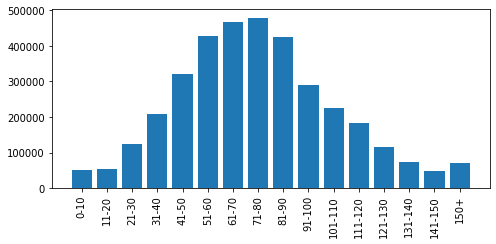

In [0]:
import matplotlib.pyplot as plt

inds=range(len(lung))
labels=["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100","101-110","111-120","121-130","131-140","141-150","150+"]

fig,ax = plt.subplots()
plt.xticks(rotation=90)
rects = ax.bar(inds, lung)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)

Most games are around 70 moves, let's see what is the exact average length of the games

In [0]:
medium=df.agg({"len": "avg"}).collect()[0][0]
medium=int(medium)
print("The average length of the matches in the dataset is" , medium)

The average length of the matches in the dataset is 75


Calculation of the maximum match length present in the dataset

In [0]:
maxgame = df.agg({"len": "max"}).collect()[0][0]
print("the longest game is", maxgame, "moves")

the longest game is 600 moves


Assign a minimum value for which a match can be considered. The average number of moves in a chess opening is 10 moves, 5 per player. So I take the games that have at least finished the opening phase

In [0]:
mingame=10

Filtered the matches with minimum 10 moves and maximum the average length.

In [0]:
df=df[(df['len'] <= medium ) & (df['len'] >= mingame ) ]

In the following cell all filtered matches have been collected and ready to be used

In [0]:
game=df.select("game").collect()

# Section 2: First approach
<p> In the first approach, the granularity of the moves used will be very raw. Moves are considered only for the piece in question and not for the entirety of the move. At the end of the train such a model must predict what kind of piece we need to move. </p>

<p>To arrive at the sliding window suitable for this approach as first we take the <b>whole matches</b> as they are in the dataset and strip them of the information of the turns and the player in question. Once this is done we have the <b>parsed game</b>. Next we have to replace the moves only with the affected pieces and we have the <b>game with only the pieces</b>. Next we divide the game with only the pieces using the sliding window technique. we divide the game into vectors of 5 elements and use the sixth element as the label. We continue moving the vector to the right until the game ends.</p>


<img src="https://www.dropbox.com/s/az8cudd0ifbl090/FirstApproach.jpg?dl=1">


<p>The approach used is this; strings are used in the figure for simplicity and clarity. In the actual approach, once we get the match with only the pieces, the pieces are encoded with integers according to a dictionary. Thus to have a list of integers.
Given a dictionary of this type: {"p" : 0, "n" : 1, "b" : 2, "r" : 3, "q" : 4, "k" : 5}, the match given in the example above will be: "00041401". The sliding window consequently will be considered with integers and not with strings.</p>

In the next cell there is the dictionary used in this approach

In [0]:
dic = {"p" : 0, "n" : 1, "b" : 2, "r" : 3, "q" : 4, "k" : 5, "fill":6}

Function for parse the moves and codify the games. This function take in input a string that identify a move and return the pice related

In [0]:
def piece(m):
  if m.startswith('O-O'):
    return "k"
  if m[0].isupper():
    if m[0].lower() in dic.keys():
      return m[0].lower()
  else:
    return "p"


Definition of n_steps. This value is used for define the timestep dimension for the slide window

In [0]:
n_steps=5

In the next cell we read the filtered matches and for each move we go to clean the data by removing in move number related to the match and then pass the cleaned move to the piece() function. <br>
 Then we padding the moves in the match by adding a null move until we get all the matches to the same length. With the padding added, all that remains is to divide the moves into slide windows of 5 timesteps. 
The slide window division is saved within file "X". In file "Y" the related labels are stored.

In [0]:
X_file = open("/tmp/X_slide_windows_10-75_5steps.txt", "w+")
Y_file = open("/tmp/Y_slide_windows_10-75_5steps.txt", "w+")
conta=0
for el in game:
  lista=[]
  if el[0]!=None:
    li=el[0].split(" ")
    for y in li:
      if y != '':
        z=y.split('.')[1]
        if z!='':
          lista.append(int(dic[piece(z)]))
  
  n = medium-len(lista)
  lfill=[int(dic["fill"]) for i in range(0,n)]
  lista=lista+lfill
  seq=lista
  for i in range(len(seq)):
        #get the last index
        lastIndex = i + n_steps
        #if lastIndex is greater than length of sequence then break
        if lastIndex > len(seq) - 1:
            break
        #Create input and output sequence
        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
        X_file.write(str(seq_X))
        X_file.write('\n')
        Y_file.write(str(seq_y))
        Y_file.write('\n')
        pass
  if conta%10000==0:
    print(conta)
  conta+=1


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [0]:
X_file.close()
Y_file.close()

In the following cells, the X and Y failes are saved in the DBFS for exporting

In [0]:
dbutils.fs.cp("file:/tmp/X_slide_windows_10-75_5steps.txt", "dbfs:/tmp/X_slide_windows_10-75_5steps.txt")
display(dbutils.fs.ls("/tmp/X_slide_windows_10-75_5steps.txt"))

path,name,size,modificationTime
dbfs:/tmp/X_slide_windows_10-75_5steps.txt,X_slide_windows_10-75_5steps.txt,2053496832,1652371564000


In [0]:
dbutils.fs.cp("file:/tmp/Y_slide_windows_10-75_5steps.txt", "dbfs:/tmp/Y_slide_windows_10-75_5steps.txt")
display(dbutils.fs.ls("/tmp/Y_slide_windows_10-75_5steps.txt"))

path,name,size,modificationTime
dbfs:/tmp/Y_slide_windows_10-75_5steps.txt,Y_slide_windows_10-75_5steps.txt,256679936,1652371600000


In [0]:
dbutils.fs.cp("dbfs:/tmp/X_slide_windows_10-75_5steps.txt", "/FileStore/X_slide_windows_10-75_5steps.txt")

Out[18]: True

In [0]:
dbutils.fs.cp("dbfs:/tmp/Y_slide_windows_10-75_5steps.txt", "/FileStore/Y_slide_windows_10-75_5steps.txt")

Out[17]: True

Let's read the saved files

In [0]:
'''
The first 300000 matches have been considered for this approach. the dataset was limited in order not to get into memory problems with databricks. In fact, by trying to use more matches, the memory of dabricks exhausted.
Using 300000 and dividing them into 5 timesteps we have 21000000 vectors and 21000000 labels.
'''
matches=300000
steps_per_match=70
n_steps=5

In [0]:
dbutils.fs.cp("dbfs:/tmp/X_slide_windows_10-75_5steps.txt", "file:/tmp/X_slide_windows_10-75_5steps.txt")
x=[]
c=0
for line in open("/tmp/X_slide_windows_10-75_5steps.txt", "r"):
  stripped_line = line.strip()
  st=stripped_line.replace("[","").replace("]","")
  s=st.split(",")
  s=[int(x) for x in s]
  x.append(s)
  if c==(matches*steps_per_match)-1:
    break
  c+=1
x = np.array(x, dtype=int)

In [0]:
dbutils.fs.cp("dbfs:/tmp/Y_slide_windows_10-75_5steps.txt", "file:/tmp/Y_slide_windows_10-75_5steps.txt")
y=[]
c=0
for line in open("/tmp/Y_slide_windows_10-75_5steps.txt", "r"):
  stripped_line = line.strip()
  y.append(int(stripped_line))
  if c==(matches*steps_per_match)-1:
    break
  c+=1
y = np.array(y, dtype=int)

In [0]:
print(len(x))
print(len(y))

21000000
21000000


In [0]:
nmoves=len(dic)-1
print("In the dictionary there are", nmoves, "moves")

In the dictionary there are 6 moves


In the following cells, the train and test set are created. 20% of the matches are used for the test set.

In [0]:
print("TRAIN X")
train_x= x[:int(len(x)*0.8)]
print("The number of elements in train_x is",len(train_x), "(80% of the dataset)")

print("TRAIN Y")
train_y = y[:int(len(y)*0.8)]
print("The number of elements in train_y is",len(train_y), "(80% of the dataset)")

TRAIN X
The number of elements in train_x is 16800000 (80% of the dataset)
TRAIN Y
The number of elements in train_y is 16800000 (80% of the dataset)


In [0]:
print("TEST X")
test_x = x[-int(len(x)*0.2):] 
print("The number of elements in test_x is",len(test_x), "(20% of the dataset)")

print("TEST Y")
test_y= y[-int(len(y)*0.2):] 
print("The number of elements in test_y is",len(test_y), "(20% of the dataset)")

TEST X
The number of elements in test_x is 4200000 (20% of the dataset)
TEST Y
The number of elements in test_y is 4200000 (20% of the dataset)


In this cell we see how the data are structured

In [0]:
for i in range(0,len(test_x[:70])):
  print(test_x[i], "  " , test_y[i])

[0 0 0 0 0]    0
[0 0 0 0 0]    0
[0 0 0 0 0]    4
[0 0 0 0 4]    1
[0 0 0 4 1]    1
[0 0 4 1 1]    0
[0 4 1 1 0]    0
[4 1 1 0 0]    1
[1 1 0 0 1]    1
[1 0 0 1 1]    2
[0 0 1 1 2]    2
[0 1 1 2 2]    5
[1 1 2 2 5]    1
[1 2 2 5 1]    3
[2 2 5 1 3]    4
[2 5 1 3 4]    3
[5 1 3 4 3]    1
[1 3 4 3 1]    1
[3 4 3 1 1]    1
[4 3 1 1 1]    2
[3 1 1 1 2]    1
[1 1 1 2 1]    1
[1 1 2 1 1]    1
[1 2 1 1 1]    1
[2 1 1 1 1]    1
[1 1 1 1 1]    1
[1 1 1 1 1]    2
[1 1 1 1 2]    2
[1 1 1 2 2]    0
[1 1 2 2 0]    0
[1 2 2 0 0]    2
[2 2 0 0 2]    0
[2 0 0 2 0]    5
[0 0 2 0 5]    4
[0 2 0 5 4]    5
[2 0 5 4 5]    0
[0 5 4 5 0]    5
[5 4 5 0 5]    2
[4 5 0 5 2]    3
[5 0 5 2 3]    2
[0 5 2 3 2]    4
[5 2 3 2 4]    1
[2 3 2 4 1]    2
[3 2 4 1 2]    1
[2 4 1 2 1]    0
[4 1 2 1 0]    0
[1 2 1 0 0]    0
[2 1 0 0 0]    0
[1 0 0 0 0]    0
[0 0 0 0 0]    1
[0 0 0 0 1]    0
[0 0 0 1 0]    1
[0 0 1 0 1]    0
[0 1 0 1 0]    2
[1 0 1 0 2]    0
[0 1 0 2 0]    2
[1 0 2 0 2]    2
[0 2 0 2 2]    5
[2 0 2 2 5]   

In the following cell, One Hot Encoding is applied on the labels of the train set.

In [0]:
train_y = to_categorical(train_y)

In this cell we see how the data are structured after the One Hot Encodind

In [0]:
for i in range(0,len(train_x[:70])):
  print(train_x[i], "  " , train_y[i])

[0 0 0 0 1]    [0. 1. 0. 0. 0. 0. 0.]
[0 0 0 1 1]    [1. 0. 0. 0. 0. 0. 0.]
[0 0 1 1 0]    [1. 0. 0. 0. 0. 0. 0.]
[0 1 1 0 0]    [0. 0. 1. 0. 0. 0. 0.]
[1 1 0 0 2]    [0. 0. 1. 0. 0. 0. 0.]
[1 0 0 2 2]    [1. 0. 0. 0. 0. 0. 0.]
[0 0 2 2 0]    [0. 1. 0. 0. 0. 0. 0.]
[0 2 2 0 1]    [0. 0. 1. 0. 0. 0. 0.]
[2 2 0 1 2]    [0. 1. 0. 0. 0. 0. 0.]
[2 0 1 2 1]    [0. 0. 1. 0. 0. 0. 0.]
[0 1 2 1 2]    [0. 1. 0. 0. 0. 0. 0.]
[1 2 1 2 1]    [0. 0. 1. 0. 0. 0. 0.]
[2 1 2 1 2]    [0. 1. 0. 0. 0. 0. 0.]
[1 2 1 2 1]    [0. 0. 0. 1. 0. 0. 0.]
[2 1 2 1 3]    [0. 1. 0. 0. 0. 0. 0.]
[1 2 1 3 1]    [0. 0. 1. 0. 0. 0. 0.]
[2 1 3 1 2]    [1. 0. 0. 0. 0. 0. 0.]
[1 3 1 2 0]    [0. 1. 0. 0. 0. 0. 0.]
[3 1 2 0 1]    [0. 0. 0. 0. 0. 1. 0.]
[1 2 0 1 5]    [0. 1. 0. 0. 0. 0. 0.]
[2 0 1 5 1]    [1. 0. 0. 0. 0. 0. 0.]
[0 1 5 1 0]    [1. 0. 0. 0. 0. 0. 0.]
[1 5 1 0 0]    [0. 1. 0. 0. 0. 0. 0.]
[5 1 0 0 1]    [0. 0. 1. 0. 0. 0. 0.]
[1 0 0 1 2]    [0. 0. 0. 1. 0. 0. 0.]
[0 0 1 2 3]    [0. 0. 1. 0. 0. 0. 0.]
[0 1 2 3 2] 

In the following cell we define values that will be used for embedding layer of the model

In [0]:
seq_len=train_x.shape[1]
vocab_size=len(dic)

Defining a callback to prevent overfitting

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=2)

In the next cell we have the model used for the train. The train of this model was performed on kaggle. The model uses two hidden LSTM layers with 100 memory cells each and a fully connected dense layer with 100 neurons connects to the hidden LSTM layers to interpret features extracted from the sequence. After the first lstm layer there is a 20% dropout layer to prevent overfitting of the data. The output layer predicts the next word as a single vector of the vocabulary size with a probability for each word in the vocabulary. A softmax activation function is used to ensure that the outputs have the normalized probability features.

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, n_steps, input_length=seq_len))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 5)              35        
                                                                 
 lstm (LSTM)                 (None, 5, 100)            42400     
                                                                 
 dropout (Dropout)           (None, 5, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 7)                 707       
                                                                 
Total params: 133,642
Trainable params: 133,642
Non-tr

In [0]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history=model.fit(train_x, train_y, batch_size=128, epochs=50, callbacks=[callback])

Epoch 1/50
    15/131250 [..............................] - ETA: 1:44:03 - loss: 1.9014 - accuracy: 0.3495

We upload the trained model

In [0]:
%sh wget https://www.dropbox.com/s/k7thce9p1ed2zi6/model_kaggle_300kgames_50epoch.h5?dl=1 -O /tmp/Kaggle_onlyPiece.csv

--2022-06-04 17:15:41--  https://www.dropbox.com/s/k7thce9p1ed2zi6/model_kaggle_300kgames_50epoch.h5?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/k7thce9p1ed2zi6/model_kaggle_300kgames_50epoch.h5 [following]
--2022-06-04 17:15:41--  https://www.dropbox.com/s/dl/k7thce9p1ed2zi6/model_kaggle_300kgames_50epoch.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc31463aa2454811b76e74aa4565.dl.dropboxusercontent.com/cd/0/get/Bmn--rzDH7_zJ5nKIi9fnzpXR1S38DSxzGEmzJ-hiPoQ-ItUqtEUh_XgGzYzXCr2goNBRta2LFcKeKQNReXO6MtjRAdqBpLeDt-Z5cdhUyTbqbuldybHRiMC4W7OiVAQZkzXjqnyn6xx-1W1M3uanbkuYK2BKI09NYXAD0r7uufNWshBiWTs8ZyMr_4Zz0DIIa0/file?dl=1# [following]
--2022-06-04 17:15:42--  https://uc31463aa2454811b76e74aa4565.dl.dropboxusercon

In [0]:
model1_onlyPiece = keras.models.load_model("/tmp/Kaggle_onlyPiece.csv")

Plotting of the loss and accuracy values during the train

In [0]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

<img src="https://www.dropbox.com/s/d2n3ur4fjvx0ety/model1_loss.png?dl=1">

In [0]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

<img src="https://www.dropbox.com/s/aa8tk4tw5u5fg42/model1_accuracy.png?dl=1">

##### Model trained on paperspace with a slightly different network
In the next cell we have the model used for the train performed on Paperspace. The model was trained on a slightly different net from the previous model to try to increase performance and not have all models trained with the same Neural Network. This model uses two hidden LSTM layers with 256 memory cells each a dense layer with 100 neurons to interpret features extracted from the sequence. After each lstm layer there is a 40% dropout layer to prevent overfitting of the data. The output layer predicts the next word as a single vector of the vocabulary size with a probability for each word in the vocabulary. A softmax activation function is used to ensure that the outputs have the normalized probability features.

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, n_steps, input_length=seq_len))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 5)              35        
                                                                 
 lstm_2 (LSTM)               (None, 5, 256)            268288    
                                                                 
 dropout (Dropout)           (None, 5, 256)            0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               25700     
                                                                 
 dense_3 (Dense)             (None, 7)                

In [0]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history=model.fit(train_x, train_y, batch_size=256, epochs=50, callbacks=[callback] )

Epoch 1/50
    5/65625 [..............................] - ETA: 5:30:42 - loss: 1.9342 - accuracy: 0.2914

We upload the trained model on Paperspace

In [0]:
%sh wget https://www.dropbox.com/s/nipbobspz4skcu1/model_paperspace_100kgames_50epoch.h5?dl=1 -O /tmp/Paperspace_onlyPiece.csv

--2022-06-04 17:16:16--  https://www.dropbox.com/s/nipbobspz4skcu1/model_paperspace_100kgames_50epoch.h5?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/nipbobspz4skcu1/model_paperspace_100kgames_50epoch.h5 [following]
--2022-06-04 17:16:17--  https://www.dropbox.com/s/dl/nipbobspz4skcu1/model_paperspace_100kgames_50epoch.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc80dbbad726932aa42756d45c81.dl.dropboxusercontent.com/cd/0/get/BmkxWDHGhArXBp0d5QeETE1u7rEPweQMzI5GsWWQ_Lmy1zvHfT9H0vY5GuY4h6L0m7BOSvg97UbNu6ways-rrruhyM-ztjIQFqb8aMibFSginy5SXuIvIrs1hPjMBTJ8dl7z0reY9erjfR2EKtFOTEoATf2wccDtPHuF-P7MYAbRZYDO6-SNImdclzPl9MgNrQU/file?dl=1# [following]
--2022-06-04 17:16:17--  https://uc80dbbad726932aa42756d45c81.dl.dr

In [0]:
model2_onlyPiece = keras.models.load_model("/tmp/Paperspace_onlyPiece.csv")

Plotting of the loss and accuracy values during the train

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

<img src="https://www.dropbox.com/s/8rzpwv7myc4im79/Model2_loss.png?dl=1">

In [0]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

<img src="https://www.dropbox.com/s/gm0kei8ae4dyp4f/Model2_accuracy.png?dl=1">

### Evaluation of first approach models
In this section the evaluation of models trained with this approach is performed. For more information on the evaluation conducted the reader is invited to read the section "Evaluation Backgorund" in the Introduction.

In the following cell, we check how many times the model exactly predicts the moves of the matches in the test set. We also calculate the perplexity of the models for each match.

In [0]:
#How many times do the models predict correctly
m1=0
m2=0
#Multiplication of probabilities for final calculation of perplexity
p_m1=1
p_m2=1
#List for saving perplexities divided by match 
p_model1=[]
p_model2=[]
gam_count=0

for i in range(0,len(test_x[:35000])):
  el = np.asarray(test_x[i])
  el = np.reshape(el, (1, len(el), 1))
  
  #MODEL 1 
  prediction = model1_onlyPiece.predict(el, verbose=0)
  index = np.argmax(prediction)
  
  p_m1=p_m1 * prediction[0][index]
  
  #MODEL 2
  
  prediction2 = model2_onlyPiece.predict(el, verbose=0)
  index2 = np.argmax(prediction2)
  p_m2=p_m2 * prediction2[0][index2]
  
  if gam_count==69:
    p_model1.append(p_m1**(-(1/70)))
    p_model2.append(p_m2**(-(1/70)))
    p_m1=1
    p_m2=1
    gam_count=0

  if index==test_y[i]:
    m1+=1
  if index2==test_y[i]:
    m2+=1
  if i%100==0:
    print(i)
  gam_count+=1
  
print("-----------------------")
print("model1 -> ", m1)
print("model2 -> ", m2)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

Once we have calculated the model perplexity for each match we calculate an average of these perplexities to compare the models

In [0]:
s_m1=0
s_m2=0
for i in range(0,len(p_model1)):
  s_m1+=p_model1[i]
  s_m2+=p_model2[i]
  
avg_m1=s_m1/len(p_model1)
avg_m2=s_m2/len(p_model2)

print("The average perplexity of model 1 is", avg_m1)
print("The average perplexity of model 2 is", avg_m2)

The average perplexity of model 1 is 2.251866545819963
The average perplexity of model 2 is 2.248328845399468


#### Discussion of evaluation results
The models created were evaluated in the same way and provided very similar results. In the extrinsic evaluation on 35000 predictions, model1 correctly predicted 19116 moves while model 2 correctly predicted 19115 moves. So the models behaved in the same way having also almost identical perplexities. We note, however, that although model 2 missed one more prediction than model 1, it had a slightly lower perplexity in fact model 2 had an average perplexity of 2.248 while model 1 had an average perplexity of 2.251.

# Section 3: Second Approach
<p>In the second approach, the granularity of the moves used is extended. In this approach I consider as a move the whole string except piece captures ("x" in the move), check ("+" at the end of the move), checkmate("#" at the end of the move) and piece disambiguations. The process of arriving at sliding windows is the same as in the first approach but considering the moves differently. For clarity, let's look at the same example given in the first approach.</p> <br>


<img src="https://www.dropbox.com/s/zji4zjp2965md9p/SecondApproach.jpg?dl=1">


<p>The same thing said in the first approach applies to this. The model is trained with integers, not strings. So once we have the match with the move formed by piece and cell I need a dictionary to encode the moves in integer. For simplicity this step is not included in figure.<br>
In the example given there is no case where a move contains a check or a checkmate. In this case a move such as Nf3+ (or Nf3#) becomes Nf3. In the case of disambiguations between pieces a move such as N4f6 becomes Nf6.</p>

Function for parse the moves and codify the games. This function take in input a string that identify a move and return the moves without takes ("x"), disambiguation, check and checkmate.

In [0]:
import re

def move_onlyInitial(m):
  if m.startswith('O-O') or len(m)<=3:
    if m[-1]=="#" or m[-1]=="+":
      m=m[:-1]
    return m
  else:
    z=""
    number = re.search(r"\d", m)
    z = m[0] + m[number.start()-1] + m[number.start()]
    return z

In the next cell we read the filtered matches and for each move we go to clean the data by removing in move number related to the match and then pass the cleaned move to the move_onlyInitial function. <br>
While cleaning the data, a set is also defined with the moves that occurred.

In [0]:
game_man=[]
conta=0
set_moves=set()
for el in game:
  lista=[]
  if el[0]!=None:
    li=el[0].split(" ")
    for y in li:
      if y != '':
        z=y.split('.')[1]
        if z!='':
          m=move_onlyInitial(z)
          set_moves.add(m)
          lista.append(m)
          
  game_man.append(lista)
          
  if conta%100000==0:
      print(conta)
  conta+=1

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000


In [0]:
print("The number of different moves is:",len(set_moves))

The number of different moves is: 522


We create a dictionary given the move set. The dictionary will have the moves as keys and an integer used for encoding as a value. A null move was added to the dictionary for padding. After that the dictionary was saved in the DFBS.

In [0]:
int_moves=dict((c, i) for i, c in enumerate(set_moves))
int_moves["fill"]=len(int_moves)

In [0]:
with open("/tmp/dic_moves_onlyInitial.txt", "w+") as fp:
    json.dump(int_moves, fp)

In [0]:
dbutils.fs.cp("file:/tmp/dic_moves_onlyInitial.txt", "dbfs:/tmp/dic_moves_onlyInitial.txt")
display(dbutils.fs.ls("/tmp/dic_moves_onlyInitial.txt"))
dbutils.fs.cp("dbfs:/tmp/dic_moves_onlyInitial.txt", "/FileStore/dic_moves_onlyInitial.txt")

In [0]:
dbutils.fs.cp("dbfs:/tmp/dic_moves_onlyInitial.txt", "file:/tmp/dic_moves_onlyInitial.txt")
with open('/tmp/dic_moves_onlyInitial.txt') as json_file:
    int_moves = json.load(json_file)

Once the dictionary is calculated, we create x and y divided by 5 timesteps and within them we put the integer coding of the moves

In [0]:
X_file = open("/tmp/X_slide_windows_10-75_5steps_games.txt", "w+")
Y_file = open("/tmp/Y_slide_windows_10-75_5steps_games.txt", "w+")
conta=0
for el in game_man:
    el2=[int(int_moves[e]) for e in el]
    n = medium-len(el2)
    lfill=[int(int_moves["fill"]) for i in range(0,n)]
    lista=el2+lfill
    seq=lista
    for i in range(len(seq)):
          #get the last index
          lastIndex = i + n_steps
          #if lastIndex is greater than length of sequence then break
          if lastIndex > len(seq) - 1:
              break
          #Create input and output sequence
          seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
          X_file.write(str(seq_X))
          X_file.write('\n')
          Y_file.write(str(seq_y))
          Y_file.write('\n')
          pass
    if conta%500==0:
      print(conta)
    conta+=1

Save "X" and "Y" in the DBFS

In [0]:
dbutils.fs.cp("file:/tmp/X_slide_windows_10-75_5steps_games.txt", "dbfs:/tmp/X_slide_windows_10-75_5steps_games.txt")
display(dbutils.fs.ls("/tmp/X_slide_windows_10-75_5steps_games.txt"))
dbutils.fs.cp("dbfs:/tmp/X_slide_windows_10-75_5steps_games.txt", "/FileStore/X_slide_windows_10-75_5steps_games.txt")

In [0]:
dbutils.fs.cp("file:/tmp/Y_slide_windows_10-75_5steps_games.txt", "dbfs:/tmp/Y_slide_windows_10-75_5steps_games.txt")
display(dbutils.fs.ls("/tmp/Y_slide_windows_10-75_5steps_games.txt"))
dbutils.fs.cp("dbfs:/tmp/Y_slide_windows_10-75_5steps_games.txt", "/FileStore/Y_slide_windows_10-75_5steps_games.txt")

Load X and Y <br>
For the following two approaches, 15000 matches were considered. Because the size of the dictionary is much larger than the first approach and memory problems were encountered when computing the One Hot Encoder. Considering 15000 matches means having 1050000 vectors given by dividing by timesteps in x and y.

In [0]:
matches=15000
steps_per_match=70
n_steps=5
nmoves=len(int_moves)-1

In [0]:
dbutils.fs.cp("dbfs:/tmp/Y_slide_windows_10-75_5steps_games.txt", "file:/tmp/Y_slide_windows_10-75_5steps_games.txt")
y=[]
c=0
for line in open("/tmp/Y_slide_windows_10-75_5steps_games.txt","r"):
  stripped_line = line.strip()
  y.append(int(stripped_line))
  if c==(matches*steps_per_match)-1:
    break
  c+=1
  
y = np.array(y, dtype=int)

In [0]:
dbutils.fs.cp("dbfs:/tmp/X_slide_windows_10-75_5steps_games.txt", "file:/tmp/X_slide_windows_10-75_5steps_games.txt")
x=[]
c=0
for line in open("/tmp/X_slide_windows_10-75_5steps_games.txt","r"):
  stripped_line = line.strip()
  st=stripped_line.replace("[","").replace("]","")
  s=st.split(",")
  s=[int(x) for x in s]
  x.append(s)
  if c==(matches*steps_per_match)-1:
    break
  c+=1

x = np.array(x, dtype=int)

In the following cells, the train and test set are created. 20% of the matches are used for the test set.

In [0]:
print("TRAIN X")
train_x= x[:int(len(x)*0.8)]
print("The number of elements in train_x is",len(train_x), "(80% of the dataset)")

print("TRAIN Y")
train_y = y[:int(len(y)*0.8)]
print("The number of elements in train_y is",len(train_y), "(80% of the dataset)")

TRAIN X
The number of elements in train_x is 840000 (80% of the dataset)
TRAIN Y
The number of elements in train_y is 840000 (80% of the dataset)


In [0]:
print("TEST X")
test_x = x[-int(len(x)*0.2):] 
print("The number of elements in test_x is",len(test_x), "(20% of the dataset)")

print("TEST Y")
test_y= y[-int(len(y)*0.2):] 
print("The number of elements in test_y is",len(test_y), "(20% of the dataset)")

TEST X
The number of elements in test_x is 210000 (20% of the dataset)
TEST Y
The number of elements in test_y is 210000 (20% of the dataset)


In this cell we see how the data are structured

In [0]:
for i in range(0,len(test_x[:70])):
  print(test_x[i], "  " , test_y[i])

[337 218 438 322 244]    464
[218 438 322 244 464]    420
[438 322 244 464 420]    219
[322 244 464 420 219]    159
[244 464 420 219 159]    167
[464 420 219 159 167]    17
[420 219 159 167  17]    225
[219 159 167  17 225]    270
[159 167  17 225 270]    33
[167  17 225 270  33]    261
[ 17 225 270  33 261]    377
[225 270  33 261 377]    485
[270  33 261 377 485]    182
[ 33 261 377 485 182]    21
[261 377 485 182  21]    303
[377 485 182  21 303]    441
[485 182  21 303 441]    265
[182  21 303 441 265]    138
[ 21 303 441 265 138]    478
[303 441 265 138 478]    190
[441 265 138 478 190]    286
[265 138 478 190 286]    98
[138 478 190 286  98]    325
[478 190 286  98 325]    110
[190 286  98 325 110]    337
[286  98 325 110 337]    96
[ 98 325 110 337  96]    218
[325 110 337  96 218]    280
[110 337  96 218 280]    408
[337  96 218 280 408]    447
[ 96 218 280 408 447]    247
[218 280 408 447 247]    301
[280 408 447 247 301]    338
[408 447 247 301 338]    522
[447 247 301 338 52

In the following cell, One Hot Encoding is applied on the labels of the train set.

In [0]:
train_y = to_categorical(train_y)

In the following cell we define values that will be used for embedding layer of the model

In [0]:
seq_len=train_x.shape[1]
vocab_size=len(int_moves)

Defining a callback to prevent overfitting

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In the next cell we have the model used for the train. The train of this model was performed on kaggle. The model uses two hidden LSTM layers with 100 memory cells each and a fully connected dense layer with 100 neurons connects to the hidden LSTM layers to interpret features extracted from the sequence. After the first lstm layer there is a 20% dropout layer to prevent overfitting of the data. The output layer predicts the next word as a single vector of the vocabulary size with a probability for each word in the vocabulary. A softmax activation function is used to ensure that the outputs have the normalized probability features.

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, n_steps, input_length=seq_len))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 5)              2615      
                                                                 
 lstm (LSTM)                 (None, 5, 100)            42400     
                                                                 
 dropout (Dropout)           (None, 5, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 523)               52823     
                                                                 
Total params: 188,338
Trainable params: 188,338
Non-trai

In [0]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history=model.fit(train_x, train_y, batch_size=64, epochs=50, callbacks=[callback] )

Epoch 1/50
  194/13125 [..............................] - ETA: 5:01 - loss: 4.5080 - accuracy: 0.2763

Loading the trained model

In [0]:
%sh wget https://www.dropbox.com/s/o4axduv8xpoblgh/OnlyInitialCell_NOFREQ_Kaggle_model.h5?dl=1 -O /tmp/Kaggle_NoFreq_100Units_onlyInitialCell.csv

--2022-06-04 11:55:42--  https://www.dropbox.com/s/o4axduv8xpoblgh/OnlyInitialCell_NOFREQ_Kaggle_model.h5?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/o4axduv8xpoblgh/OnlyInitialCell_NOFREQ_Kaggle_model.h5 [following]
--2022-06-04 11:55:43--  https://www.dropbox.com/s/dl/o4axduv8xpoblgh/OnlyInitialCell_NOFREQ_Kaggle_model.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4ec578d802b7d8ef0b1e0b4392.dl.dropboxusercontent.com/cd/0/get/Bmi9Bi2v6ZuTE8cTaXZAjfDhCfCGmGH3pjdkinMxevjMFqfwLMQgcNgcfQ89SaO5f1KQyqXuewy5J81kzJsg7vqPJTgG4fQ489Y4bDNpgPacONU0Zr0EgS-0E5Edq0uRD0GHDFj2Rkw-Iq-t8W4DsAfPyg5nuGBXOlydkvLTIS1wkIXGlO_nJMGRGBNl_YA3yTY/file?dl=1# [following]
--2022-06-04 11:55:43--  https://uc4ec578d802b7d8ef0b1e0b4392.dl

In [0]:
model1_Initialmoves = keras.models.load_model("/tmp/Kaggle_NoFreq_100Units_onlyInitialCell.csv")

Plotting of the loss and accuracy values during the train

In [0]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

<img src="https://www.dropbox.com/s/gz0vh95qjw6rta7/model3_losss.png?dl=1">

In [0]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

<img src="https://www.dropbox.com/s/3jrbjcwr1u7dp92/model3_accuracy.png?dl=1">

##### Second Model trained with a slightly different network
In the next cell we have the model used for the train performed on kaggle. The model uses two hidden LSTM layers with 256 memory cells each and a fully connected dense layer with 256 neurons connects to the hidden LSTM layers to interpret features extracted from the sequence. After the first lstm layer there is a 20% dropout layer to prevent overfitting of the data. The output layer predicts the next word as a single vector of the vocabulary size with a probability for each word in the vocabulary. A softmax activation function is used to ensure that the outputs have the normalized probability features.

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, n_steps, input_length=seq_len))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dense(256, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 5)              2615      
                                                                 
 lstm_2 (LSTM)               (None, 5, 256)            268288    
                                                                 
 dropout_1 (Dropout)         (None, 5, 256)            0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 523)               134411    
                                                                 
Total params: 996,418
Trainable params: 996,418
Non-tr

In [0]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history=model.fit(train_x, train_y, batch_size=64, epochs=50, callbacks=[callback] )

Epoch 1/50
   21/13125 [..............................] - ETA: 16:39 - loss: 5.6784 - accuracy: 0.2805

Loading the second trained model

In [0]:
%sh wget https://www.dropbox.com/s/zzr0xjf5yi78fqz/model_OnlyInitial_NoFreq_256Units.h5?dl=1 -O /tmp/Kaggle_NoFreq_256Units_onlyInitialCell.csv

--2022-06-04 11:55:56--  https://www.dropbox.com/s/zzr0xjf5yi78fqz/model_OnlyInitial_NoFreq_256Units.h5?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/zzr0xjf5yi78fqz/model_OnlyInitial_NoFreq_256Units.h5 [following]
--2022-06-04 11:55:56--  https://www.dropbox.com/s/dl/zzr0xjf5yi78fqz/model_OnlyInitial_NoFreq_256Units.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9cc8b0ed55d1f314a73bdb543f.dl.dropboxusercontent.com/cd/0/get/Bmgue4yJjXvNFb7o8_2EEFxYeslypHZBw9GzHjPJbJMa7GKYZG7MMrg-Uwb8WCQeKGygdyZYcR56GetHxYeS-0xK1uZcG50FmU0dI1hI0PgGBlSQi0s8VafjxTvM6bTZ_JE0cYr3lGpQN3O8QPyTCyxjajvUCZqkReooHZaI0xmO4BMmdM1U2j9x_qHGnAkjJ_E/file?dl=1# [following]
--2022-06-04 11:55:56--  https://uc9cc8b0ed55d1f314a73bdb543f.dl.dropb

In [0]:
model2_Initialmoves = keras.models.load_model("/tmp/Kaggle_NoFreq_256Units_onlyInitialCell.csv")

Plotting of the loss and accuracy values during the train

In [0]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

<img src="https://www.dropbox.com/s/cb4n7d459nith21/Model4_loss.png?dl=1">

In [0]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

<img src="https://www.dropbox.com/s/nosg96kwndnstgi/Model4_accuracy.png?dl=1">

##### Third Model trained with the same Neural Netwrok of the previus model but for 100 epochs
Given the results obtained with the previous model, since it was better than the first one, I trained a third model with the same network as the second one but making it train for 100 epochs.

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, n_steps, input_length=seq_len))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dense(256, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 5)              2615      
                                                                 
 lstm (LSTM)                 (None, 5, 256)            268288    
                                                                 
 dropout (Dropout)           (None, 5, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dense_1 (Dense)             (None, 523)               134411    
                                                                 
Total params: 996,418
Trainable params: 996,418
Non-trai

In [0]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history=model.fit(train_x, train_y, batch_size=32, epochs=100, callbacks=[callback])

Epoch 1/100
   22/26250 [..............................] - ETA: 22:13 - loss: 5.7439 - accuracy: 0.2685

Loading the third trained model

In [0]:
%sh wget https://www.dropbox.com/s/r5fphpb09dreepq/model_OnlyInitial_NoFreq_256Units_100epoch.h5?dl=1 -O /tmp/Kaggle_NoFreq_256Units_100epoch_onlyInitialCell.csv

--2022-06-04 11:56:11--  https://www.dropbox.com/s/r5fphpb09dreepq/model_OnlyInitial_NoFreq_256Units_100epoch.h5?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/r5fphpb09dreepq/model_OnlyInitial_NoFreq_256Units_100epoch.h5 [following]
--2022-06-04 11:56:12--  https://www.dropbox.com/s/dl/r5fphpb09dreepq/model_OnlyInitial_NoFreq_256Units_100epoch.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucac65acb331719a1be6248a4c7e.dl.dropboxusercontent.com/cd/0/get/BmjHtuR3VYmzUiYvNtliKkVPXimCpNkSr3-uu_LrpuJDxKpmjd5KK0HaMCciPQ8NZ7iAokAbpnCtRKAMMvHDWJ2ivoW4nh97Prx8xmS9Jl948MyevUCdSG2TopB5kmfICwzusgmJTicnjFgdVQADIVodjEkx3VZEMzTcATJrToC54ewk_B2qOnBRflJ7x71CyjY/file?dl=1# [following]
--2022-06-04 11:56:12--  https://ucac65acb3

In [0]:
model3_Initialmoves = keras.models.load_model("/tmp/Kaggle_NoFreq_256Units_100epoch_onlyInitialCell.csv")

Plotting of the loss and accuracy values during the train

In [0]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

<img src="https://www.dropbox.com/s/2cwu18r732s8515/model5_loss.png?dl=1">

In [0]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

<img src="https://www.dropbox.com/s/hprvvxvw4l6gjz6/Model5_accuracy.png?dl=1">

##### Fourth Model created using the most frequent moves
For the fourth model in this approach, a new dictionary was calculated by taking only the most frequent moves and giving all others an additional move. With this method I tried to reduce the dictionary to increase performance.

In the following cell I calculate the frequence of the moves on the games contained in x.

In [0]:
frequency={}
for el in x:
  for e in el:
    e=int(e)
    if e in frequency.keys():
      frequency[e]=frequency[e]+1
    else:
      frequency[e]=1

In the next cell is the declaration of two functions used on the frequency dictionary just computed. <br>
The **averageFreq** function calculates what is the average occurrence of the moves within the dictionary.<br>
The **freq_dic** funcion takes as input the average value of occurrences and generates a dictionary only with the moves that occur more times than the average.

In [0]:
def averageFreq():
  s=0
  for el in frequency:
    s=s+frequency[el]
  return s/len(frequency)

def freq_dic(avg):
  freq_dic={}
  for el in frequency:
    if frequency[el]>=avg:
      freq_dic[el]=frequency[el]
  return freq_dic

In the next cell I call the function averageFreq and use the value it returns to compute the new dictionary with the function freq_dic.

In [0]:
avg_freq=int(averageFreq())
print("The average frequency of moves is",avg_freq)

The average frequency of moves is 10396


In [0]:
freq_dic=freq_dic(avg_freq)
print("The number of moves that occur more times than the average is",len(freq_dic))
print(freq_dic)

The number of moves that occur more times than the average is 115
{244: 44558, 518: 53971, 32: 40670, 247: 41667, 261: 71635, 219: 74381, 507: 24775, 139: 21873, 159: 30045, 350: 40650, 216: 21393, 166: 38690, 329: 14191, 390: 15589, 10: 23593, 378: 13690, 382: 15434, 190: 114600, 361: 22403, 335: 18416, 99: 34063, 246: 25407, 337: 35177, 292: 13805, 98: 39876, 387: 15967, 515: 15090, 412: 18258, 182: 26142, 91: 33061, 64: 16297, 322: 33013, 467: 39676, 161: 15110, 50: 15312, 270: 15291, 225: 22816, 522: 1304258, 447: 11454, 355: 14081, 438: 64378, 285: 23927, 49: 38850, 408: 17223, 368: 14357, 402: 21898, 144: 47954, 256: 31615, 286: 13280, 314: 14087, 238: 24104, 370: 18001, 463: 29806, 218: 46079, 72: 17354, 422: 28841, 138: 44880, 167: 53653, 491: 11121, 191: 25406, 242: 20740, 116: 14492, 317: 35584, 324: 16493, 343: 13888, 404: 21331, 336: 10923, 21: 22188, 330: 11119, 464: 30860, 437: 19870, 420: 13626, 201: 30411, 15: 33145, 149: 32238, 51: 11979, 411: 11887, 325: 24094, 239: 1

So far freq_dic is composed of the encoding of the move as the key and the frequency of that move as the value. Now we assign a new encoding to the old encoding, since the numbers present from the old encoding are not in order and the one hot encoder would return vectors too large compared to what we need. <br>
Also at the end of the dictionary an extra move to encode all the moves that occur less times than average is added.

In [0]:
dic_f=dict((c, i) for i, c in enumerate(freq_dic.keys()))
#Element for uncommon moves
dic_f[len(int_moves)]=len(dic_f)
print(dic_f)

{244: 0, 518: 1, 32: 2, 247: 3, 261: 4, 219: 5, 507: 6, 139: 7, 159: 8, 350: 9, 216: 10, 166: 11, 329: 12, 390: 13, 10: 14, 378: 15, 382: 16, 190: 17, 361: 18, 335: 19, 99: 20, 246: 21, 337: 22, 292: 23, 98: 24, 387: 25, 515: 26, 412: 27, 182: 28, 91: 29, 64: 30, 322: 31, 467: 32, 161: 33, 50: 34, 270: 35, 225: 36, 522: 37, 447: 38, 355: 39, 438: 40, 285: 41, 49: 42, 408: 43, 368: 44, 402: 45, 144: 46, 256: 47, 286: 48, 314: 49, 238: 50, 370: 51, 463: 52, 218: 53, 72: 54, 422: 55, 138: 56, 167: 57, 491: 58, 191: 59, 242: 60, 116: 61, 317: 62, 324: 63, 343: 64, 404: 65, 336: 66, 21: 67, 330: 68, 464: 69, 437: 70, 420: 71, 201: 72, 15: 73, 149: 74, 51: 75, 411: 76, 325: 77, 239: 78, 120: 79, 265: 80, 96: 81, 386: 82, 195: 83, 93: 84, 60: 85, 81: 86, 469: 87, 478: 88, 392: 89, 441: 90, 440: 91, 485: 92, 340: 93, 372: 94, 263: 95, 377: 96, 9: 97, 44: 98, 457: 99, 277: 100, 17: 101, 473: 102, 267: 103, 186: 104, 349: 105, 176: 106, 77: 107, 184: 108, 12: 109, 115: 110, 121: 111, 123: 112, 2

Save the dictionary in the DBFS.

In [0]:
import json
with open("/tmp/dic_freq_moves_onlyInitial.txt", "w+") as fp:
    json.dump(dic_f, fp)

In [0]:
dbutils.fs.cp("file:/tmp/dic_freq_moves_onlyInitial.txt", "dbfs:/tmp/dic_freq_moves_onlyInitial.txt")
display(dbutils.fs.ls("/tmp/dic_freq_moves_onlyInitial.txt"))
dbutils.fs.cp("dbfs:/tmp/dic_freq_moves_onlyInitial.txt", "/FileStore/dic_freq_moves_onlyInitial.txt")
#community.cloud.databricks.com/files/dic_freq_moves_onlyInitial.txt?o=5604700270830977

In [0]:
dbutils.fs.cp("dbfs:/tmp/dic_freq_moves_onlyInitial.txt", "file:/tmp/dic_freq_moves_onlyInitial.txt")
with open('/tmp/dic_freq_moves_onlyInitial.txt') as json_file:
    app = json.load(json_file)

In [0]:
dic_f={}
for key, value in app.items():
  dic_f[int(key)]=int(value)

Encoding x and y with the new encoding

In [0]:
out=len(int_moves)
for i in range(0,len(x)):
  s=[]
  for e in x[i]:
    if int(e) in dic_f:
      s.append(dic_f[e])
    else:
      s.append(dic_f[out])
  x[i]=s

In [0]:
dbutils.fs.cp("dbfs:/tmp/Y_slide_windows_10-75_5steps_games.txt", "file:/tmp/Y_slide_windows_10-75_5steps_games.txt")
out=len(int_moves)
y=[]
c=0
for line in open("/tmp/Y_slide_windows_10-75_5steps_games.txt", "r"):
  stripped_line = line.strip()
  s_l=int(stripped_line)
  if s_l in dic_f:
    y.append(dic_f[s_l])
  else:
    y.append(dic_f[out])
  if c==(matches*steps_per_match)-1:
    break
  c+=1
y = np.array(y, dtype=int)

In the following cells, the train and test set are created. 20% of the matches are used for the test set.

In [0]:
print("TRAIN X")
train_freq_x= x[:int(len(x)*0.8)]
print("The number of elements in train_x is",len(train_freq_x), "(80% of the dataset)")

print("TRAIN Y")
train_freq_y = y[:int(len(y)*0.8)]
print("The number of elements in train_y is",len(train_freq_y), "(80% of the dataset)")

TRAIN X
The number of elements in train_x is 840000 (80% of the dataset)
TRAIN Y
The number of elements in train_y is 840000 (80% of the dataset)


In [0]:
print("TEST X")
test_freq_x = x[-int(len(x)*0.2):] 
print("The number of elements in test_x is",len(test_freq_x), "(20% of the dataset)")

print("TEST Y")
test_freq_y= y[-int(len(y)*0.2):] 
print("The number of elements in test_y is",len(test_freq_y), "(20% of the dataset)")

TEST X
The number of elements in test_x is 210000 (20% of the dataset)
TEST Y
The number of elements in test_y is 210000 (20% of the dataset)


In this cell we see how the data are structured

In [0]:
for i in range(0,len(test_freq_x[:70])):
  print(test_freq_x[i], "  " , test_freq_y[i])

[337 218 438 322 244]    464
[218 438 322 244 464]    420
[438 322 244 464 420]    219
[322 244 464 420 219]    159
[244 464 420 219 159]    167
[464 420 219 159 167]    17
[420 219 159 167  17]    225
[219 159 167  17 225]    270
[159 167  17 225 270]    33
[167  17 225 270  33]    261
[ 17 225 270  33 261]    377
[225 270  33 261 377]    485
[270  33 261 377 485]    182
[ 33 261 377 485 182]    21
[261 377 485 182  21]    303
[377 485 182  21 303]    441
[485 182  21 303 441]    265
[182  21 303 441 265]    138
[ 21 303 441 265 138]    478
[303 441 265 138 478]    190
[441 265 138 478 190]    286
[265 138 478 190 286]    98
[138 478 190 286  98]    325
[478 190 286  98 325]    110
[190 286  98 325 110]    337
[286  98 325 110 337]    96
[ 98 325 110 337  96]    218
[325 110 337  96 218]    280
[110 337  96 218 280]    408
[337  96 218 280 408]    447
[ 96 218 280 408 447]    247
[218 280 408 447 247]    301
[280 408 447 247 301]    338
[408 447 247 301 338]    522
[447 247 301 338 52

In the following cell, One Hot Encoding is applied on the labels of the train set.

In [0]:
train_freq_y = to_categorical(train_freq_y)

In the following cell we define values that will be used for embedding layer of the model

In [0]:
seq_len=train_freq_x.shape[1]
vocab_size=len(dic_f)

Defining a callback to prevent overfitting

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In the next cell we have the model used for the train. The train of this model was performed on kaggle. For this model we use the same Neural Network of the first model.

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, n_steps, input_length=seq_len))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 5)              580       
                                                                 
 lstm_2 (LSTM)               (None, 5, 100)            42400     
                                                                 
 dropout_1 (Dropout)         (None, 5, 100)            0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 116)               11716     
                                                                 
Total params: 145,196
Trainable params: 145,196
Non-tr

In [0]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history=model.fit(train_freq_x, train_freq_y, batch_size=64, epochs=50, callbacks=[callback])

Epoch 1/50
   40/13125 [..............................] - ETA: 4:50 - loss: 4.0846 - accuracy: 0.2914

Loading the trained model

In [0]:
%sh wget https://www.dropbox.com/s/8zz9fkbcb3saazc/OnlyInitialCell_FREQ_Kaggle_model.h5?dl=1 -O /tmp/Kaggle_Freq_100Units_onlyInitialCell.csv

--2022-06-04 11:56:43--  https://www.dropbox.com/s/8zz9fkbcb3saazc/OnlyInitialCell_FREQ_Kaggle_model.h5?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/8zz9fkbcb3saazc/OnlyInitialCell_FREQ_Kaggle_model.h5 [following]
--2022-06-04 11:56:43--  https://www.dropbox.com/s/dl/8zz9fkbcb3saazc/OnlyInitialCell_FREQ_Kaggle_model.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc29fc4b2713ef37ee0e8311fb5d.dl.dropboxusercontent.com/cd/0/get/Bmh8iOFB1mBTdV1O0Ul7mcgGMc4VuAThpcxisTbIZBvJwUn5_z5us_LGTGwCwk9KrpCe98ZjdpwsagbzLiNofMVfwDbtLiCfh3pFYc3hETIPZ8S2iAs0yy2CEEuv-xox6tREZooLyhk2xRDpFuSiDPDtY_p74lYMSnyNNQ-KyjPJzyJm31xjTdPniaM6fZ4SKAA/file?dl=1# [following]
--2022-06-04 11:56:44--  https://uc29fc4b2713ef37ee0e8311fb5d.dl.dropb

In [0]:
model4_Initialmoves = keras.models.load_model("/tmp/Kaggle_Freq_100Units_onlyInitialCell.csv")

Plotting of the loss and accuracy values during the train

In [0]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

<img src="https://www.dropbox.com/s/a74f9mko2es7utr/Model6_loss.png?dl=1">

In [0]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

<img src="https://www.dropbox.com/s/83f7rlc3fw2hf4k/Model6_accuracy.png?dl=1">

### Evaluation of Second approach models
In this section the evaluation of models trained with this approach is performed. For more information on the evaluation conducted the reader is invited to read the section "Evaluation Backgorund" in the Introduction.

In the following cell, we check how many times the model exactly predicts the moves of the matches in the test set. We also calculate the perplexity of the models for each match.

In [0]:
#How many times do the models predict correctly
m1=0
m2=0
m3=0
m4=0
#Multiplication of probabilities for final calculation of perplexity
p_m1=1
p_m2=1
p_m3=1
p_m4=1
#List for saving perplexities divided by match 
p_model1=[]
p_model2=[]
p_model3=[]
p_model4=[]

gam_count=0
for i in range(0,len(test_x[:35000])):
  el = np.asarray(test_x[i])
  el = np.reshape(el, (1, len(el), 1))
  
  el_freq = np.asarray(test_freq_x[i])
  el_freq = np.reshape(el_freq, (1, len(el_freq), 1))
  
  #MODEL 1 
  prediction = model1_Initialmoves.predict(el, verbose=0)
  index = np.argmax(prediction)
  p_m1=p_m1 * prediction[0][index]

  #MODEL 2
  prediction2 = model2_Initialmoves.predict(el, verbose=0)
  index2 = np.argmax(prediction2)
  p_m2=p_m2 * prediction2[0][index2]
  
  #MODEL 3
  prediction3 = model3_Initialmoves.predict(el, verbose=0)
  index3 = np.argmax(prediction3)
  p_m3=p_m3 * prediction3[0][index3]
  
  #MODEL 4
  prediction4 = model4_Initialmoves.predict(el_freq, verbose=0)
  index4 = np.argmax(prediction4)
  p_m4=p_m4 * prediction4[0][index4]
  
  if gam_count==69:
    p_model1.append(p_m1**(-(1/70)))
    p_model2.append(p_m2**(-(1/70)))
    p_model3.append(p_m3**(-(1/70)))
    p_model4.append(p_m4**(-(1/70)))
    p_m1=1
    p_m2=1
    p_m3=1
    p_m4=1
    gam_count=0

  if index==test_y[i]:
    m1+=1
  if index2==test_y[i]:
    m2+=1
  if index3==test_y[i]:
    m3+=1
  if index4==test_freq_y[i]:
    m4+=1
  if i%100==0:
    print(i)
    
  gam_count+=1
  
print("-----------------------")
print("model1 -> ", m1)
print("model2 -> ", m2)
print("model3 -> ", m3)
print("model4 (frequencies) -> ", m4)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

Once we have calculated the model perplexity for each match we calculate an average of these perplexities to compare the models

In [0]:
s_m1=0
s_m2=0
s_m3=0
s_m4=0
for i in range(0,len(p_model1)):
  s_m1+=p_model1[i]
  s_m2+=p_model2[i]
  s_m3+=p_model3[i]
  s_m4+=p_model4[i]
  
avg_m1=s_m1/len(p_model1)
avg_m2=s_m2/len(p_model2)
avg_m3=s_m3/len(p_model3)
avg_m4=s_m4/len(p_model4)

print("The average perplexity of model 1 is", avg_m1)
print("The average perplexity of model 2 is", avg_m2)
print("The average perplexity of model 3 is", avg_m3)
print("The average perplexity of model 4 (frequencies) is", avg_m4)

The average perplexity of model 1 is 5.480566942177195
The average perplexity of model 2 is 4.225299987699861
The average perplexity of model 3 is 3.971523752831022
The average perplexity of model 4 (frequencies) is 1.9508132250131074


#### Discussion of evaluation results
The created models were evaluated in the same way. In the extrinsic evaluation out of 35000 predictions the The trained models without frequencies gave very similar values predicting correctly from 15676 to 16033 times. Model 1 predicted the fewest times while model 2 had the highest accuracy. The model with the dictionary reduced by the frequencies of the moves predicted 20974 times correctly. The perplexity of these models follows a similar pattern. The model with the reduced dictionary has an average complexity of 1.9 which is lower than the others. The perplexity of the trained models without frequencies, on the other hand, follows a different trand than the correct predictions. The model with the worst perplexity is still model 1, with an average perplexity of 5.4. Then follows model 2 with an average complexity of 4.22 and finally the third model with an average complexity of 3.97.

# Section 4: Third Approaches

<p>In the third approach, granularity is increased compared to the second approach. Disambiguities between pieces are also considered in this approach. So the only things that have not been considered are check, checkmate and capture of pieces.The process of arriving at sliding windows is the same the other two approaches but considering the moves differently.</p>


<img src="https://www.dropbox.com/s/zw12jnad5dqh9we/ThirdApproach.jpg?dl=1">


<p>In this approach, as in the others, before creating the sliding windows the moves must be encoded and transformed to integer. For this example, the initial whole game is not a real game, in fact the written moves are not legal. I chose these moves so that I could show all the examples of how granularity of moves is managed in this approach.</p>

Function for parse the moves and codify the games. This function take in input a string that identify a move and return the moves without takes ("x"), check and checkmate.

In [0]:
def move_complete(m):
  if m.startswith('O-O'):
    return m
  if m[-1]=="#" or m[-1]=="+":
      m=m[:-1]
  cell=m[-2:]
  m=m[:-2]
  if len(m)==2 and m[1]=='x':
    m=m[:1]
  if len(m)==3 and m[2]=='x':
    m=m[:2]
  return m + cell

In the next cell we read the filtered matches and for each move we go to clean the data by removing in move number related to the match and then pass the cleaned move to the move_complete function. <br>

In [0]:
game_man=[]
conta=0
for el in game:
  lista=[]
  if el[0]!=None:
    li=el[0].split(" ")
    for y in li:
      if y != '':
        z=y.split('.')[1]
        if z!='':
          m=move_complete(z)
          lista.append(m)
          
  game_man.append(lista)
  if conta%100000==0:
      print(conta)
  conta+=1

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000


In [0]:
print(game_man[10])

['d4', 'e6', 'c4', 'b6', 'a3', 'Bb7', 'Nc3', 'f5', 'd5', 'Nf6', 'g3', 'Na6', 'Bg2', 'Nc5', 'Nh3', 'Bd6', 'O-O', 'Be5', 'Qc2', 'O-O', 'Rd1', 'Qe7', 'Be3', 'Rab8', 'Rac1', 'Nce4', 'Ne4', 'Ne4', 'Nf4', 'c5', 'dc6', 'Bc6', 'Nd3', 'Bf6', 'f3', 'Nc5', 'b4', 'Nd3', 'Rd3', 'd5', 'f4', 'dc4', 'Qc4', 'Bg2', 'Kg2', 'Rf7', 'b5', 'Re8', 'Rcd1', 'e5', 'Rd7', 'Qe6', 'Qe6', 'Re6', 'Kf3', 'ef4', 'gf4', 'Rd7', 'Rd7', 'Re7', 'Re7', 'Be7', 'a4', 'Kf7', 'Bd4', 'Bd6', 'e4', 'g6', 'h3', 'Ke6', 'Bc3', 'Bc7', 'Bb4', 'Bd8', 'e5']


In the next cell we reduce the number of matches to 15000 and calculate a dictionary with all the moves within these matches, in this dictionary we also save the frequencies of the moves.

In [0]:
dic_moves={}
game_man=game_man[:15000]
for el in game_man:
  for e in el:
    if e in dic_moves.keys():
      dic_moves[e]=dic_moves[e]+1
    else:
      dic_moves[e]=1

In [0]:
print("The length of the dic is",len(dic_moves))
print(dic_moves)

The length of the dic is 1421
{'d4': 14688, 'd5': 12567, 'c4': 11344, 'e6': 9787, 'Nc3': 14469, 'Nf6': 17290, 'cd5': 4960, 'ed5': 4411, 'Bg5': 6060, 'Be7': 8138, 'e3': 4285, 'Ne4': 7372, 'Bd8': 713, 'Nd1': 372, 'Bc7': 703, 'Nb2': 280, 'Rb1': 2127, 'Nc4': 3021, 'Bc4': 4743, 'dc4': 2788, 'Ne2': 2191, 'O-O': 22913, 'b6': 4537, 'Na6': 1344, 'Bd6': 3695, 'Rd8': 3738, 'Ba3': 967, 'Bb7': 5092, 'e4': 12286, 'f6': 2770, 'Ke2': 728, 'Nc7': 1167, 'Rhd1': 216, 'Ba6': 2059, 'Ke3': 322, 'Kf7': 1440, 'g4': 3205, 'g5': 3036, 'h4': 3668, 'h6': 5242, 'Rh1': 391, 'Re8': 4564, 'f3': 3267, 'hg5': 938, 'fg5': 308, 'd6': 7082, 'Nd5': 7478, 'Bd5': 3037, 'Rh6': 427, 'c3': 3090, 'd7': 179, 'Re6': 1109, 'Rh7': 384, 'Kg8': 1236, 'Rbh1': 7, 'Bc6': 3076, 'Rh8': 487, 'Ra8': 1337, 'Bd7': 4575, 'Qd5': 2321, 'Qa5': 2819, 'Nf3': 15607, 'c6': 5392, 'Ne5': 7403, 'Bf5': 3456, 'Be4': 2885, 'a3': 4386, 'Nbd7': 3776, 'Be3': 6332, 'de5': 2658, 'Ng4': 1817, 'Bd4': 2831, 'b4': 4836, 'Qd8': 1888, 'Ne3': 1587, 'dc6': 721, 'bc6': 1

Save the dictionary calculated

In [0]:
with open("/tmp/dic_freq_moves_completeGames_15k.txt", "w+") as fp:
    json.dump(dic_moves, fp)

In [0]:
dbutils.fs.cp("file:/tmp/dic_freq_moves_completeGames_15k.txt", "dbfs:/tmp/dic_freq_moves_completeGames_15k.txt")
display(dbutils.fs.ls("/tmp/dic_freq_moves_completeGames_15k.txt"))
dbutils.fs.cp("dbfs:/tmp/dic_freq_moves_completeGames_15k.txt", "/FileStore/dic_freq_moves_completeGames_15k.txt")
#community.cloud.databricks.com/files/dic_freq_moves_completeGames_15k.txt?o=5604700270830977

Encoding of the frequency dictionary and adding at the end of the dictionary an element that we will use for padding.

In [0]:
int_moves=dict((c, i) for i, c in enumerate(dic_moves.keys()))
int_moves["fill"]=len(int_moves)
print(int_moves)

{'d4': 0, 'd5': 1, 'c4': 2, 'e6': 3, 'Nc3': 4, 'Nf6': 5, 'cd5': 6, 'ed5': 7, 'Bg5': 8, 'Be7': 9, 'e3': 10, 'Ne4': 11, 'Bd8': 12, 'Nd1': 13, 'Bc7': 14, 'Nb2': 15, 'Rb1': 16, 'Nc4': 17, 'Bc4': 18, 'dc4': 19, 'Ne2': 20, 'O-O': 21, 'b6': 22, 'Na6': 23, 'Bd6': 24, 'Rd8': 25, 'Ba3': 26, 'Bb7': 27, 'e4': 28, 'f6': 29, 'Ke2': 30, 'Nc7': 31, 'Rhd1': 32, 'Ba6': 33, 'Ke3': 34, 'Kf7': 35, 'g4': 36, 'g5': 37, 'h4': 38, 'h6': 39, 'Rh1': 40, 'Re8': 41, 'f3': 42, 'hg5': 43, 'fg5': 44, 'd6': 45, 'Nd5': 46, 'Bd5': 47, 'Rh6': 48, 'c3': 49, 'd7': 50, 'Re6': 51, 'Rh7': 52, 'Kg8': 53, 'Rbh1': 54, 'Bc6': 55, 'Rh8': 56, 'Ra8': 57, 'Bd7': 58, 'Qd5': 59, 'Qa5': 60, 'Nf3': 61, 'c6': 62, 'Ne5': 63, 'Bf5': 64, 'Be4': 65, 'a3': 66, 'Nbd7': 67, 'Be3': 68, 'de5': 69, 'Ng4': 70, 'Bd4': 71, 'b4': 72, 'Qd8': 73, 'Ne3': 74, 'dc6': 75, 'bc6': 76, 'Rd1': 77, 'Rab8': 78, 'Rc1': 79, 'Rfd8': 80, 'c5': 81, 'Bc5': 82, 'bc5': 83, 'g6': 84, 'Rb2': 85, 'Rd2': 86, 'e5': 87, 'Nc6': 88, 'd3': 89, 'Bb3': 90, 'Nbd2': 91, 'Be6': 92, 'Qd

Saving of the encoding dictionary

In [0]:
import json
with open("/tmp/dic_moves_completeGames_15k.txt", "w+") as fp:
    json.dump(int_moves, fp)

In [0]:
dbutils.fs.cp("file:/tmp/dic_moves_completeGames_15k.txt", "dbfs:/tmp/dic_moves_completeGames_15k.txt")
display(dbutils.fs.ls("/tmp/dic_moves_completeGames_15k.txt"))
dbutils.fs.cp("dbfs:/tmp/dic_moves_completeGames_15k.txt", "/FileStore/dic_moves_completeGames_15k.txt")
#community.cloud.databricks.com/files/dic_moves_completeGames_15k.txt?o=5604700270830977

In [0]:
dbutils.fs.cp("dbfs:/tmp/dic_freq_moves_completeGames_15k.txt", "file:/tmp/dic_freq_moves_completeGames_15k.txt")
with open('/tmp/dic_freq_moves_completeGames_15k.txt') as json_file:
    dic_moves = json.load(json_file)

In [0]:
dbutils.fs.cp("dbfs:/tmp/dic_moves_completeGames_15k.txt", "file:/tmp/dic_moves_completeGames_15k.txt")
with open('/tmp/dic_moves_completeGames_15k.txt') as json_file:
    int_moves = json.load(json_file)

Creating x and y by dividing by 5 timesteps and within the sliding windows we put the integer coding of the moves.

In [0]:
n_steps=5
manipulated_x=[]
manipulated_y=[]
conta=0
for el in game_man:
    el2=[int(int_moves[e]) for e in el]
    n = medium-len(el2)
    lfill=[int(int_moves["fill"]) for i in range(0,n)]
    lista=el2+lfill
    seq=lista
    for i in range(len(seq)):
          #get the last index
          lastIndex = i + n_steps
          #if lastIndex is greater than length of sequence then break
          if lastIndex > len(seq) - 1:
              break
          #Create input and output sequence
          seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
          manipulated_x.append(seq_X)
          manipulated_y.append(seq_y)
          pass
    if conta%500==0:
      print(conta)
    conta+=1

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500


Saving of X and Y to the DBFS.

In [0]:
with open("/tmp/X_slide_windows_10-75_5steps_CompleteGames_15K.txt", "w+") as f:
    for el in manipulated_x:
      s=str(el[0])+","+str(el[1])+","+str(el[2])+","+str(el[3])+","+str(el[4])
      f.write("{}\n".format(s))

In [0]:
dbutils.fs.cp("file:/tmp/X_slide_windows_10-75_5steps_CompleteGames_15K.txt", "dbfs:/tmp/X_slide_windows_10-75_5steps_CompleteGames_15K.txt")
display(dbutils.fs.ls("/tmp/X_slide_windows_10-75_5steps_CompleteGames_15K.txt"))
dbutils.fs.cp("dbfs:/tmp/X_slide_windows_10-75_5steps_CompleteGames_15K.txt", "/FileStore/X_slide_windows_10-75_5steps_CompleteGames_15K.txt")
#community.cloud.databricks.com/files/X_slide_windows_10-75_5steps_CompleteGames_15K.txt?o=5604700270830977

path,name,size,modificationTime
dbfs:/tmp/X_slide_windows_10-75_5steps_CompleteGames_15K.txt,X_slide_windows_10-75_5steps_CompleteGames_15K.txt,19988577,1654292953000


Out[17]: True

In [0]:
with open("/tmp/Y_slide_windows_10-75_5steps_CompleteGames_15K.txt", "w+") as f:
    for el in manipulated_y:
      f.write("{}\n".format(str(el)))

In [0]:
dbutils.fs.cp("file:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_15K.txt", "dbfs:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_15K.txt")
display(dbutils.fs.ls("/tmp/Y_slide_windows_10-75_5steps_CompleteGames_15K.txt"))
dbutils.fs.cp("dbfs:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_15K.txt", "/FileStore/Y_slide_windows_10-75_5steps_CompleteGames_15K.txt")
#community.cloud.databricks.com/files/Y_slide_windows_10-75_5steps_CompleteGames_15K.txt?o=5604700270830977

path,name,size,modificationTime
dbfs:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_15K.txt,Y_slide_windows_10-75_5steps_CompleteGames_15K.txt,4102906,1654293000000


Out[19]: True

Code for read X and Y from the DBFS.

In [0]:
dbutils.fs.cp("dbfs:/tmp/X_slide_windows_10-75_5steps_CompleteGames_15K.txt", "file:/tmp/X_slide_windows_10-75_5steps_CompleteGames_15K.txt")
x=[]
c=0
for line in open("/tmp/X_slide_windows_10-75_5steps_CompleteGames_15K.txt","r"):
    stripped_line = line.strip()
    s=stripped_line.split(",")
    s=[int(e) for e in s]
    x.append(s)

x = np.array(x, dtype=int)

In [0]:
dbutils.fs.cp("dbfs:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_15K.txt", "file:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_15K.txt")
y=[]
for line in open("/tmp/Y_slide_windows_10-75_5steps_CompleteGames_15K.txt","r"):
  stripped_line = line.strip()
  y.append(int(stripped_line))
y = np.array(y, dtype=int)

In the following cells, the train and test set are created. 20% of the matches are used for the test set.

In [0]:
print("TRAIN X")
train_x= x[:int(len(x)*0.8)]
print("The number of elements in train_x is",len(train_x), "(80% of the dataset)")

print("TRAIN Y")
train_y = y[:int(len(y)*0.8)]
print("The number of elements in train_y is",len(train_y), "(80% of the dataset)")

TRAIN X
The number of elements in train_x are 840000 (80% of the dataset)
TRAIN Y
The number of elements in train_y are 840000 (80% of the dataset)


In [0]:
print("TEST X")
test_x = x[-int(len(x)*0.2):] 
print("The number of elements in test_x is",len(test_x), "(20% of the dataset)")

print("TEST Y")
test_y= y[-int(len(y)*0.2):] 
print("The number of elements in test_y is",len(test_y), "(20% of the dataset)")

TEST X
The number of elements in test_x are 210000 (20% of the dataset)
TEST Y
The number of elements in test_y are 210000 (20% of the dataset)


In the following cell, One Hot Encoding is applied on the labels of the train set.

In [0]:
train_y = to_categorical(train_y)

In the following cell we define values that will be used for embedding layer of the model

In [0]:
seq_len=x.shape[1]
vocab_size=len(int_moves)

Defining a callback to prevent overfitting

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In the next cell we have the model used for the train performed on kaggle. The Neural Network used is the same of the first model.

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, n_steps, input_length=seq_len))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 5, 5)              7110      
                                                                 
 lstm_4 (LSTM)               (None, 5, 100)            42400     
                                                                 
 dropout_2 (Dropout)         (None, 5, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1422)              143622    
                                                                 
Total params: 283,632
Trainable params: 283,632
Non-tr

In [0]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history=model.fit(train_x, train_y, batch_size=64, epochs=50, callbacks=[callback])

Epoch 1/50
   19/13125 [..............................] - ETA: 6:12 - loss: 7.2216 - accuracy: 0.2640

We upload the trained model

In [0]:
%sh wget https://www.dropbox.com/s/c47y4dxcoit4bbk/Kaggle_model_completeGames_15K.h5?dl=1 -O /tmp/Kaggle_NoFreq_completeGames.csv

--2022-06-04 07:56:10--  https://www.dropbox.com/s/c47y4dxcoit4bbk/Kaggle_model_completeGames_15K.h5?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/c47y4dxcoit4bbk/Kaggle_model_completeGames_15K.h5 [following]
--2022-06-04 07:56:11--  https://www.dropbox.com/s/dl/c47y4dxcoit4bbk/Kaggle_model_completeGames_15K.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc48614cd436b32cdf98c7fae05.dl.dropboxusercontent.com/cd/0/get/BmjyXfV59cuhDEdWLndI7t4tBEQgg-ya6Oty2YFPPRws5C5MrBii1HxcbiyKOEJK0Au5aAXXC9cqQFdX9OklpPgnWi1gJSjT61AwGm0dHJK7WaHwbWDIbcu4z0vF8-6TeURsG7z0DCc_4-Y5X25hgq_UmTxowGwcQ9H-WoOg3J5Yoxizq0XTadnsmB_ae2fi1FM/file?dl=1# [following]
--2022-06-04 07:56:11--  https://ucc48614cd436b32cdf98c7fae05.dl.dropboxusercon

In [0]:
model1_completeGames = keras.models.load_model("/tmp/Kaggle_NoFreq_completeGames.csv")

Plotting of the loss and accuracy values during the train

In [0]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

<img src="https://www.dropbox.com/s/gbvi9ttsyfwsaku/model7_loss.png?dl=1">

In [0]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

<img src="https://www.dropbox.com/s/g3jcucnmyj5b9rb/Model7_accuracy.png?dl=1">

##### Second Model created using the most frequent moves
For the second model in this approach, a new dictionary was calculated by taking only the most frequent moves and giving all others an additional move. With this method I tried to reduce the dictionary to increase performance.

In the following cell the average occurrence of the moves is calculated

In [0]:
s=0
for k,v in dic_moves.items():
  s+=v
avg_freq_completeGames=s/len(dic_moves)
print("The average of the frequencies of the moves is",avg_freq_completeGames)

The average of the frequencies of the moves is 578.707248416608


In the next cell the set of moves that occur more times than the average is calculated

In [0]:
se=set()
for k,v in dic_moves.items():
  if v >=avg_freq_completeGames:
    se.add(k)
print("The moves that occur more times than the average are",len(se))

The moves that occur more times than the average are 287


A dictionary is created in the next cell for encoding the moves just selected

In [0]:
dict_freq_int=dict((c, i) for i, c in enumerate(se))
dict_freq_int["fill"]=len(se)
dict_freq_int["other"]=len(se)+1
print(dict_freq_int)

{'Rd6': 0, 'Bd2': 1, 'Ne8': 2, 'gf5': 3, 'g4': 4, 'Qh4': 5, 'Kh1': 6, 'Qe6': 7, 'Nb5': 8, 'Ng5': 9, 'Nc4': 10, 'Bg5': 11, 'Ba4': 12, 'Bc6': 13, 'Qf7': 14, 'Bd5': 15, 'Bg2': 16, 'Rc7': 17, 'Ba6': 18, 'Na5': 19, 'Kg7': 20, 'Rc6': 21, 'Bh6': 22, 'Bb2': 23, 'Bc4': 24, 'Kd2': 25, 'Ne4': 26, 'Qd8': 27, 'Nc6': 28, 'Qd1': 29, 'a5': 30, 'Rd5': 31, 'Bh5': 32, 'Nc5': 33, 'Rc8': 34, 'a3': 35, 'Nd6': 36, 'h3': 37, 'Rf8': 38, 'Nf5': 39, 'Ne6': 40, 'Nh4': 41, 'Qc3': 42, 'Qg6': 43, 'Ra6': 44, 'Qb8': 45, 'Bf5': 46, 'Rb6': 47, 'Bb5': 48, 'Nge2': 49, 'Qc5': 50, 'Be2': 51, 'c6': 52, 'Bf6': 53, 'Qa7': 54, 'de5': 55, 'Bg3': 56, 'Qf3': 57, 'Bc1': 58, 'h4': 59, 'h6': 60, 'Qg5': 61, 'Qb3': 62, 'cb5': 63, 'Kd8': 64, 'Re5': 65, 'Ra8': 66, 'c4': 67, 'ab3': 68, 'a4': 69, 'Rc3': 70, 'bc6': 71, 'Qf4': 72, 'f6': 73, 'Qd4': 74, 'O-O': 75, 'gf3': 76, 'Rfd8': 77, 'g6': 78, 'bc4': 79, 'Rc5': 80, 'Nd3': 81, 'Bc7': 82, 'Nd2': 83, 'Qa4': 84, 'Kh7': 85, 'Rf4': 86, 'Qd6': 87, 'Bc3': 88, 'Qe4': 89, 'gf6': 90, 'Nfd7': 91, 'Ra7'

Saving the dictionary to the DBFS.

In [0]:
with open("/tmp/dic_freq_int_completeGames_15k.txt", "w+") as fp:
    json.dump(dict_freq_int, fp)

In [0]:
dbutils.fs.cp("file:/tmp/dic_freq_int_completeGames_15k.txt", "dbfs:/tmp/dic_freq_int_completeGames_15k.txt")
display(dbutils.fs.ls("/tmp/dic_freq_int_completeGames_15k.txt"))
dbutils.fs.cp("dbfs:/tmp/dic_freq_int_completeGames_15k.txt", "/FileStore/dic_freq_int_completeGames_15k.txt")
#community.cloud.databricks.com/files/dic_freq_int_completeGames_15k.txt?o=5604700270830977

I read the moves of the parsed matches for the model without the frequencies and code the matches with the newly computed dictionary<br>
Then we padding the moves in the match by adding a null move until we bring all the matches to the same length. With the padding added, all that remains is to divide the moves into slide windows of 5 timesteps.

In [0]:
manipulated_x=[]
manipulated_y=[]
conta=0
for el in game_man:
    el2=[]
    for e in el:
      if e in dict_freq_int.keys():
        el2.append(dict_freq_int[e])
      else:
        el2.append(dict_freq_int["other"])
        
    n = medium-len(el2)
    lfill=[int(dict_freq_int["fill"]) for i in range(0,n)]
    lista=el2+lfill
    seq=lista
    for i in range(len(seq)):
          #get the last index
          lastIndex = i + n_steps
          #if lastIndex is greater than length of sequence then break
          if lastIndex > len(seq) - 1:
              break
          #Create input and output sequence
          seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
          manipulated_x.append(seq_X)
          manipulated_y.append(seq_y)
          pass
    if conta%500==0:
      print(conta)    
    conta+=1

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500


In this cell we see how the data are structured

In [0]:
for i in range(0,len(manipulated_x[:1000])):
  print(manipulated_x[i],manipulated_y[i])

[224, 276, 67, 243, 277] 154
[276, 67, 243, 277, 154] 256
[67, 243, 277, 154, 256] 253
[243, 277, 154, 256, 253] 11
[277, 154, 256, 253, 11] 193
[154, 256, 253, 11, 193] 135
[256, 253, 11, 193, 135] 26
[253, 11, 193, 135, 26] 193
[11, 193, 135, 26, 193] 277
[193, 135, 26, 193, 277] 206
[135, 26, 193, 277, 206] 288
[26, 193, 277, 206, 288] 82
[193, 277, 206, 288, 82] 288
[277, 206, 288, 82, 288] 153
[206, 288, 82, 288, 153] 10
[288, 82, 288, 153, 10] 24
[82, 288, 153, 10, 24] 269
[288, 153, 10, 24, 269] 282
[153, 10, 24, 269, 282] 75
[10, 24, 269, 282, 75] 277
[24, 269, 282, 75, 277] 230
[269, 282, 75, 277, 230] 276
[282, 75, 277, 230, 276] 141
[75, 277, 230, 276, 141] 162
[277, 230, 276, 141, 162] 186
[230, 276, 141, 162, 186] 104
[276, 141, 162, 186, 104] 242
[141, 162, 186, 104, 242] 167
[162, 186, 104, 242, 167] 73
[186, 104, 242, 167, 73] 249
[104, 242, 167, 73, 249] 265
[242, 167, 73, 249, 265] 288
[167, 73, 249, 265, 288] 18
[73, 249, 265, 288, 18] 288
[249, 265, 288, 18, 288] 23

In the following cells X and Y are saved in the DBFS

In [0]:
with open("/tmp/X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt", "w+") as f:
    for el in manipulated_x:
      s=str(el[0])+","+str(el[1])+","+str(el[2])+","+str(el[3])+","+str(el[4])
      f.write("{}\n".format(s))

In [0]:
dbutils.fs.cp("file:/tmp/X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt", "dbfs:/tmp/X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt")
display(dbutils.fs.ls("/tmp/X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt"))
dbutils.fs.cp("dbfs:/tmp/X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt", "/FileStore/X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt")
#community.cloud.databricks.com/files/X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt?o=5604700270830977

path,name,size,modificationTime
dbfs:/tmp/X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt,X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt,19666114,1654293421000


Out[40]: True

In [0]:
with open("/tmp/Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt", "w+") as f:
    for el in manipulated_y:
      f.write("{}\n".format(str(el)))

In [0]:
dbutils.fs.cp("file:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt", "dbfs:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt")
display(dbutils.fs.ls("/tmp/Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt"))
dbutils.fs.cp("dbfs:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt", "/FileStore/Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt")
#community.cloud.databricks.com/files/Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt?o=5604700270830977

path,name,size,modificationTime
dbfs:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt,Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt,3943900,1654293490000


Out[44]: True

Code to read X and Y saved in files

In [0]:
dbutils.fs.cp("dbfs:/tmp/X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt", "file:/tmp/X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt")
x=[]
c=0
for line in open("/tmp/X_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt","r"):
    stripped_line = line.strip()
    s=stripped_line.split(",")
    s=[int(e) for e in s]
    x.append(s)

x = np.array(x, dtype=int)

In [0]:
dbutils.fs.cp("dbfs:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt", "file:/tmp/Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt")
y=[]
for line in open("/tmp/Y_slide_windows_10-75_5steps_CompleteGames_freq_15K.txt","r"):
  stripped_line = line.strip()
  y.append(int(stripped_line))
y = np.array(y, dtype=int)

In the following cells, the train and test set are created. 20% of the matches are used for the test set.

In [0]:
print("TRAIN X")
train_freq_x= x[:int(len(x)*0.8)]
print("The number of elements in train_x is",len(train_freq_x), "(80% of the dataset)")

print("TRAIN Y")
train_freq_y = y[:int(len(y)*0.8)]
print("The number of elements in train_y is",len(train_freq_y), "(80% of the dataset)")

TRAIN X
The number of elements in train_x are 840000 (80% of the dataset)
TRAIN Y
The number of elements in train_y are 840000 (80% of the dataset)


In [0]:
print("TEST X")
test_freq_x = x[-int(len(x)*0.2):] 
print("The number of elements in test_x is",len(test_freq_x), "(20% of the dataset)")

print("TEST Y")
test_freq_y= y[-int(len(y)*0.2):] 
print("The number of elements in test_y is",len(test_freq_y), "(20% of the dataset)")

TEST X
The number of elements in test_x are 210000 (20% of the dataset)
TEST Y
The number of elements in test_y are 210000 (20% of the dataset)


In the following cell, One Hot Encoding is applied on the labels of the train set.

In [0]:
train_freq_y = to_categorical(train_freq_y)

In the following cell we define values that will be used for embedding layer of the model

In [0]:
seq_len=train_freq_x.shape[1]
vocab_size=len(dict_freq_int)

Defining a callback to prevent overfitting

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In the next cell we have the model used for the train performed on kaggle. The Neural Network used for this model is the same of the first model in the first approach.

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, n_steps, input_length=seq_len))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 5, 5)              1445      
                                                                 
 lstm_6 (LSTM)               (None, 5, 100)            42400     
                                                                 
 dropout_3 (Dropout)         (None, 5, 100)            0         
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 289)               29189     
                                                                 
Total params: 163,534
Trainable params: 163,534
Non-tr

In [0]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history=model.fit(train_freq_x, train_freq_y, batch_size=64, epochs=50, callbacks=[callback])

Epoch 1/50
   52/13125 [..............................] - ETA: 4:33 - loss: 4.8349 - accuracy: 0.2707

We upload the trained model

In [0]:
%sh wget https://www.dropbox.com/s/uhoagxy944eppd6/Kaggle_model_completeGames_freq_15K.h5?dl=1 -O /tmp/Kaggle_Freq_completeGames.csv

--2022-06-04 07:58:10--  https://www.dropbox.com/s/uhoagxy944eppd6/Kaggle_model_completeGames_freq_15K.h5?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/uhoagxy944eppd6/Kaggle_model_completeGames_freq_15K.h5 [following]
--2022-06-04 07:58:10--  https://www.dropbox.com/s/dl/uhoagxy944eppd6/Kaggle_model_completeGames_freq_15K.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8a9a0bc886ee5f6a69aaf272d7.dl.dropboxusercontent.com/cd/0/get/BmhDjyMBm7s8muwZYDz-U5SSNBPA2HpyB9z2EGjM_c1tNAtASKEKZ7nl5yg-mrKg8I6wpSjK9WZQ3Q6CcGhFsRFof02WbVPyzm6BRaz4DUXWT8ptOU8a9dwDy1PnmzWH-yGuJ2oFNV_tBkYD0iGOd6S0GbCIvh72-uP6IXhyt83utcjNZRR_dNN9wAIsCLGZNnM/file?dl=1# [following]
--2022-06-04 07:58:11--  https://uc8a9a0bc886ee5f6a69aaf272d7.dl

In [0]:
model2_completeGames = keras.models.load_model("/tmp/Kaggle_Freq_completeGames.csv")

In [0]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

<img src="https://www.dropbox.com/s/jjg0ktmyzq85kwe/Model8_loss.png?dl=1">

In [0]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

<img src="https://www.dropbox.com/s/igmu586vzfhmg04/Model8_accuracy.png?dl=1">

### Evaluation of Third approach models
In this section the evaluation of models trained with this approach is performed. For more information on the evaluation conducted the reader is invited to read the section "Evaluation Backgorund" in the Introduction.

In [0]:
#How many times do the models predict correctly
m1=0
m2=0
#Multiplication of probabilities for final calculation of perplexity
p_m1=1
p_m2=1
#List for saving perplexities divided by match
p_model1=[]
p_model2=[]
 
gam_count=0
for i in range(0,len(test_x[:35000])):
  el = np.asarray(test_x[i])
  el = np.reshape(el, (1, len(el), 1))
  
  el_freq = np.asarray(test_freq_x[i])
  el_freq = np.reshape(el_freq, (1, len(el_freq), 1))
  
  #MODEL 1 
  prediction = model1_completeGames.predict(el, verbose=0)
  index = np.argmax(prediction)
  p_m1=p_m1 * prediction[0][index]
  
  #MODEL 2
  prediction2 = model2_completeGames.predict(el_freq, verbose=0)
  index2 = np.argmax(prediction2)
  p_m2=p_m2 * prediction2[0][index2]
  
  if gam_count==69:
    p_model1.append(p_m1**(-(1/70)))
    p_model2.append(p_m2**(-(1/70)))
    p_m1=1
    p_m2=1
    gam_count=0

  if index==test_y[i]:
    m1+=1
  if index2==test_freq_y[i]:
    m2+=1
  if i%100==0:
    print(i)
    
  gam_count+=1
  
print("-----------------------")
print("model1 -> ", m1)
print("model2 -> ", m2)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

Once we have calculated the model perplexity for each match we calculate an average of these perplexities to compare the models

In [0]:
s_m1=0
s_m2=0
for i in range(0,len(p_model1)):
  s_m1+=p_model1[i]
  s_m2+=p_model2[i]
  
avg_m1=s_m1/len(p_model1)
avg_m2=s_m2/len(p_model2)

print("The average perplexity of model 1 is", avg_m1)
print("The average perplexity of model 2 is", avg_m2)

The average perplexity of model 1 is 6.041866274582815
The average perplexity of model 2 is 3.842215829198064


#### Discussion of evaluation results
The models created were evaluated in the same way. In the extrinsic evaluation out of 35000 predictions. Model 1 correctly predicted 15520 times while model 2, which considers only the most frequent moves, correctly predicts 16434 times. The perplexity of these models follows the same trend. Model 2 also has lower perplexity than model 1. In fact, model 2 has a perplexity of 3.8 and model 2 of 6.04.

# Section 5: Application to use case
<p>In order to show real use of these models, an application for playing chess was created.</p>
<p>Since databricks does not support keyboard input, the application was developed on a kaggle notebook. It is possible to find the application <a href="https://www.kaggle.com/code/valeriogoretti98/bigdataapplication-chess">here</a>.</p>
<p>The cells that were created for application on kaggle are listed below for completeness of the project. However, the executable application is located on kaggle.</p>

Installation of required libraries

In [0]:
%pip install chess
%pip install gym-chess

Import of installed libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
import json

Loading models

In [0]:
model_onlyPiece=keras.models.load_model("../input/chessmodelbigdata/model_kaggle_300kgames_50epoch.h5")
model_completeGames=keras.models.load_model("../input/chessmodelbigdata/Kaggle_model_completeGames_15K.h5")
model_onlyInitial=keras.models.load_model("../input/chessmodelbigdata/model_OnlyInitial_NoFreq_256Units.h5")

In [0]:
Loading dictionaries

In [0]:
with open('../input/chessmodelbigdata/dic_moves_onlyInitial_100kgames.txt') as json_file:
    dic_OnlyInitial = json.load(json_file)

In [0]:
with open('../input/chessmodelbigdata/dic_moves_completeGames_15k.txt') as json_file:
    dic_completeGames = json.load(json_file)

In [0]:
dic = {"p" : 0, "n" : 1, "b" : 2, "r" : 3, "q" : 4, "k" : 5, "fill":6}

Definition of a function that given a list of 5 elements and one element sets that element to the last position in the list and moves the others down one position. This function will serve us to track the moves made during the game so that the models can predict the next move.

In [0]:
def shift(l,m):
    for i in range(0,5):
        if i!=4:
            l[i]=l[i+1]
        else:
            l[i]=m
    return l

In the following cell is declares the piece function that given a move returns the piece used. This function is used to create the sliding windows for the first approach model. Also defined is the decode_piece function that given an encoding returns the name of the piece.

In [0]:
def piece(m):
  if m.startswith('O-O'):
    return "k"
  if m[0].isupper():
    if m[0].lower() in dic.keys():
      return m[0].lower()
  else:
    return "p"

def decode_piece(n):
    for k,v in dic.items():
        if v==n:
            return k

In the following cell is declares the def move_onlyInitial function that given a move returns the appropriate parsed move for the second approach.  This function is used to create the sliding windows for the second approach model. Also defined is the decode_OnlyInitial function that given an encoding returns the name of the piece.

In [0]:
import re

def move_onlyInitial(m):
  if m.startswith('O-O') or len(m)<=3:
    if m[-1]=="#" or m[-1]=="+":
      m=m[:-1]
    return m
  else:
    z=""
    number = re.search(r"\d", m)
    z = m[0] + m[number.start()-1] + m[number.start()]
    return z

def decode_OnlyInitial(n):
    for k,v in dic_OnlyInitial.items():
        if v==n:
            return k

In the following cell is declares the def move_complete function that given a move returns the appropriate parsed move for the third approach.  This function is used to create the sliding windows for the third approach model. Also defined is the decode_completeGames function that given an encoding returns the name of the piece.

In [0]:
def move_complete(m):
  if m.startswith('O-O'):
    return m
  if m[-1]=="#" or m[-1]=="+":
      m=m[:-1]
  cell=m[-2:]
  m=m[:-2]
  if len(m)==2 and m[1]=='x':
    m=m[:1]
  if len(m)==3 and m[2]=='x':
    m=m[:2]
  return m + cell

def decode_completeGames(n):
    for k,v in dic_completeGames.items():
        if v==n:
            return k

In the following cell is the application that allows us to play and practice chess by following the moves recommended by the models

In [0]:
import gym
import gym_chess
import chess
import time
import numpy as np

env = gym.make('Chess-v0')
board = chess.Board()
env.reset()

only_piece=[0,0,0,0,0]
only_Initial=[0,0,0,0,0]
complete_game=[0,0,0,0,0]
print(env.render(mode='unicode'))
c=0
while board.is_checkmate()==False or board.is_stalemate()==False:
    if c>=5:
        #ONLY PIECE
        el = np.asarray(only_piece)
        el = np.reshape(el, (1, len(el), 1))
        prediction = model_onlyPiece.predict(el, verbose=0)
        index = np.argmax(prediction)
        print("Only Piece Advice -> ",decode_piece(index))
        #ONLY INITIAL
        el2 = np.asarray(only_Initial)
        el2 = np.reshape(el2, (1, len(el2), 1))
        prediction2 = model_onlyInitial.predict(el2, verbose=0)
        index2 = np.argmax(prediction2)
        print("Only Cell Advice -> ",decode_OnlyInitial(index2))
        #COMPLETE GAMES
        el3 = np.asarray(complete_game)
        el3 = np.reshape(el3, (1, len(el3), 1))
        prediction3 = model_completeGames.predict(el3, verbose=0)
        index3 = np.argmax(prediction3)
        print("Complete Moves Advice -> ",decode_completeGames(index3))
    
    if c%2==0:
        print("\n White player -> Insert your move:")
    else:
        print("\n Black player -> Insert your move:")
        
    mo = input()
    
    only_piece=shift(only_piece,dic[piece(mo)])
    only_Initial=shift(only_Initial,dic_OnlyInitial[move_onlyInitial(mo)])
    complete_game=shift(complete_game,dic_completeGames[move_complete(mo)])
    
    
    env.step(board.parse_san(mo))
    board.push_san(mo)
    
    print("\n")
    print(env.render(mode='unicode'))
    c+=1